# Imports

In [114]:
import neurokit as nk
import numpy as np
import pandas as pd

# Read data from files and clean it

In [115]:
fileName='./data/M/2019_07_03_MP_Dep_Run1.txt'

In [116]:
#Big endian to little endian conversion needed to read acq recorded on windows :/
#nk.read_acqknowledge('./data/M/2019_07_03_MP_Dep_Run1.acq')

In [117]:
#df, sampling_rate = nk.read_acqknowledge('./data/M/2019_07_03_MP_Dep_Run1.acq', return_sampling_rate=True)

In [118]:
df=pd.read_csv(fileName,header=[15])

In [119]:
sampling_rate = 1000

In [120]:
df.columns.values

array(['CH1', 'CH2', 'CH3', 'CH40', 'CH41', 'CH42', 'Unnamed: 6'],
      dtype=object)

In [280]:
df.head() #CH41 = RR intervals biopac

,36000000,5227.97851562,0,0.997976183891,"[0.6406494379043579, 0.4710371792316437]",25.7559947968,"""3d c++""","[123.00469970703125, 101.56085968017578]","[23.990371704101562, 25.75599479675293]",27.4547424316,0.0
0,36000000,5227.994629,0,0.895557,"[0.640300452709198, 0.4715985655784607]",25.500610,"""3d c++""","[122.93769073486328, 101.45307159423828]","[23.77280044555664, 25.5006103515625]",27.265289,0.0
1,36000000,5228.002441,0,0.949618,"[0.6399326324462891, 0.4715932607650757]",25.451216,"""3d c++""","[122.86705780029297, 101.45409393310547]","[23.7381534576416, 25.451215744018555]",27.363159,0.0
2,36000000,5228.018555,0,0.954258,"[0.6401204466819763, 0.4711623787879944]",25.381903,"""3d c++""","[122.90312957763672, 101.53681945800781]","[23.66082191467285, 25.38190269470215]",27.529457,0.0
3,36000000,5228.026855,0,0.997839,"[0.640839695930481, 0.47153377532958984]",25.395845,"""3d c++""","[123.04122161865234, 101.46551513671875]","[23.657392501831055, 25.395845413208008]",27.158960,0.0
4,36000000,5228.034668,0,0.999800,"[0.6399237513542175, 0.4715534746646881]",25.577293,"""3d c++""","[122.86536407470703, 101.46173858642578]","[23.855239868164062, 25.577293395996094]",27.385452,0.0


In [122]:
ecg_data = df[['CH3']]
rr_intervals = df[['CH41']]

In [150]:
type(ecg_data)

pandas.core.frame.DataFrame

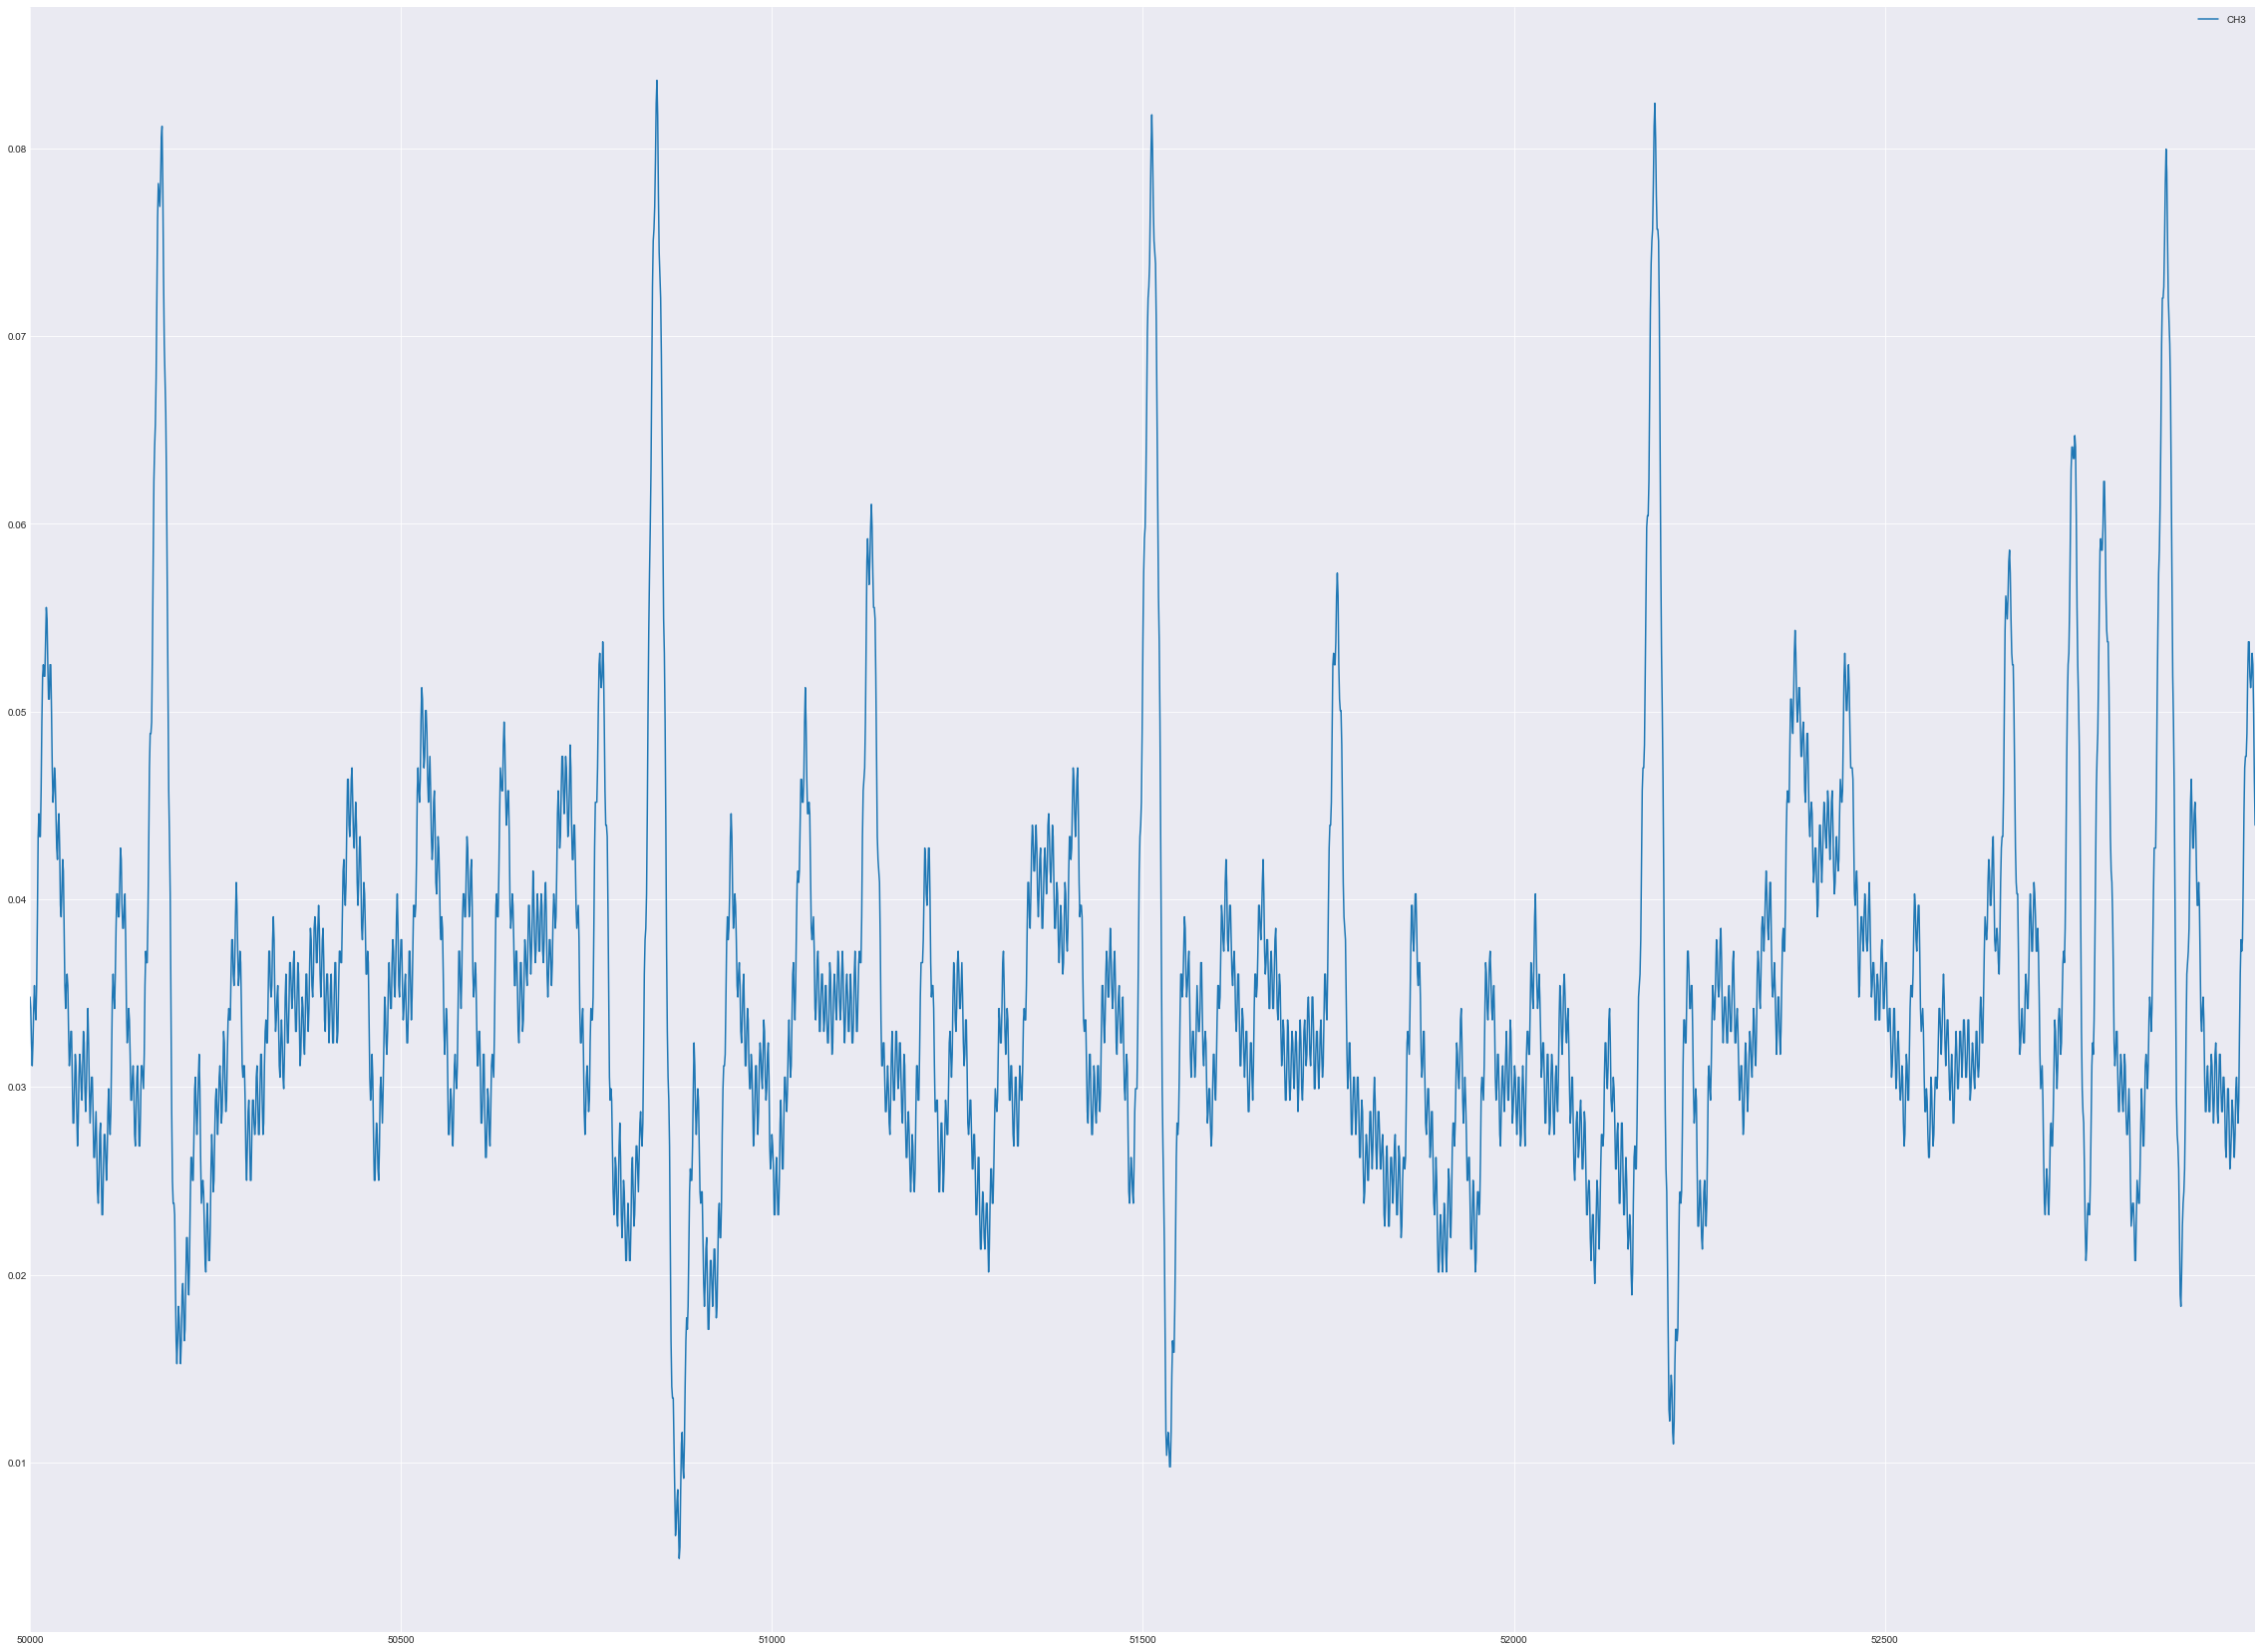

In [124]:
ecg_data[50000:53000].plot()

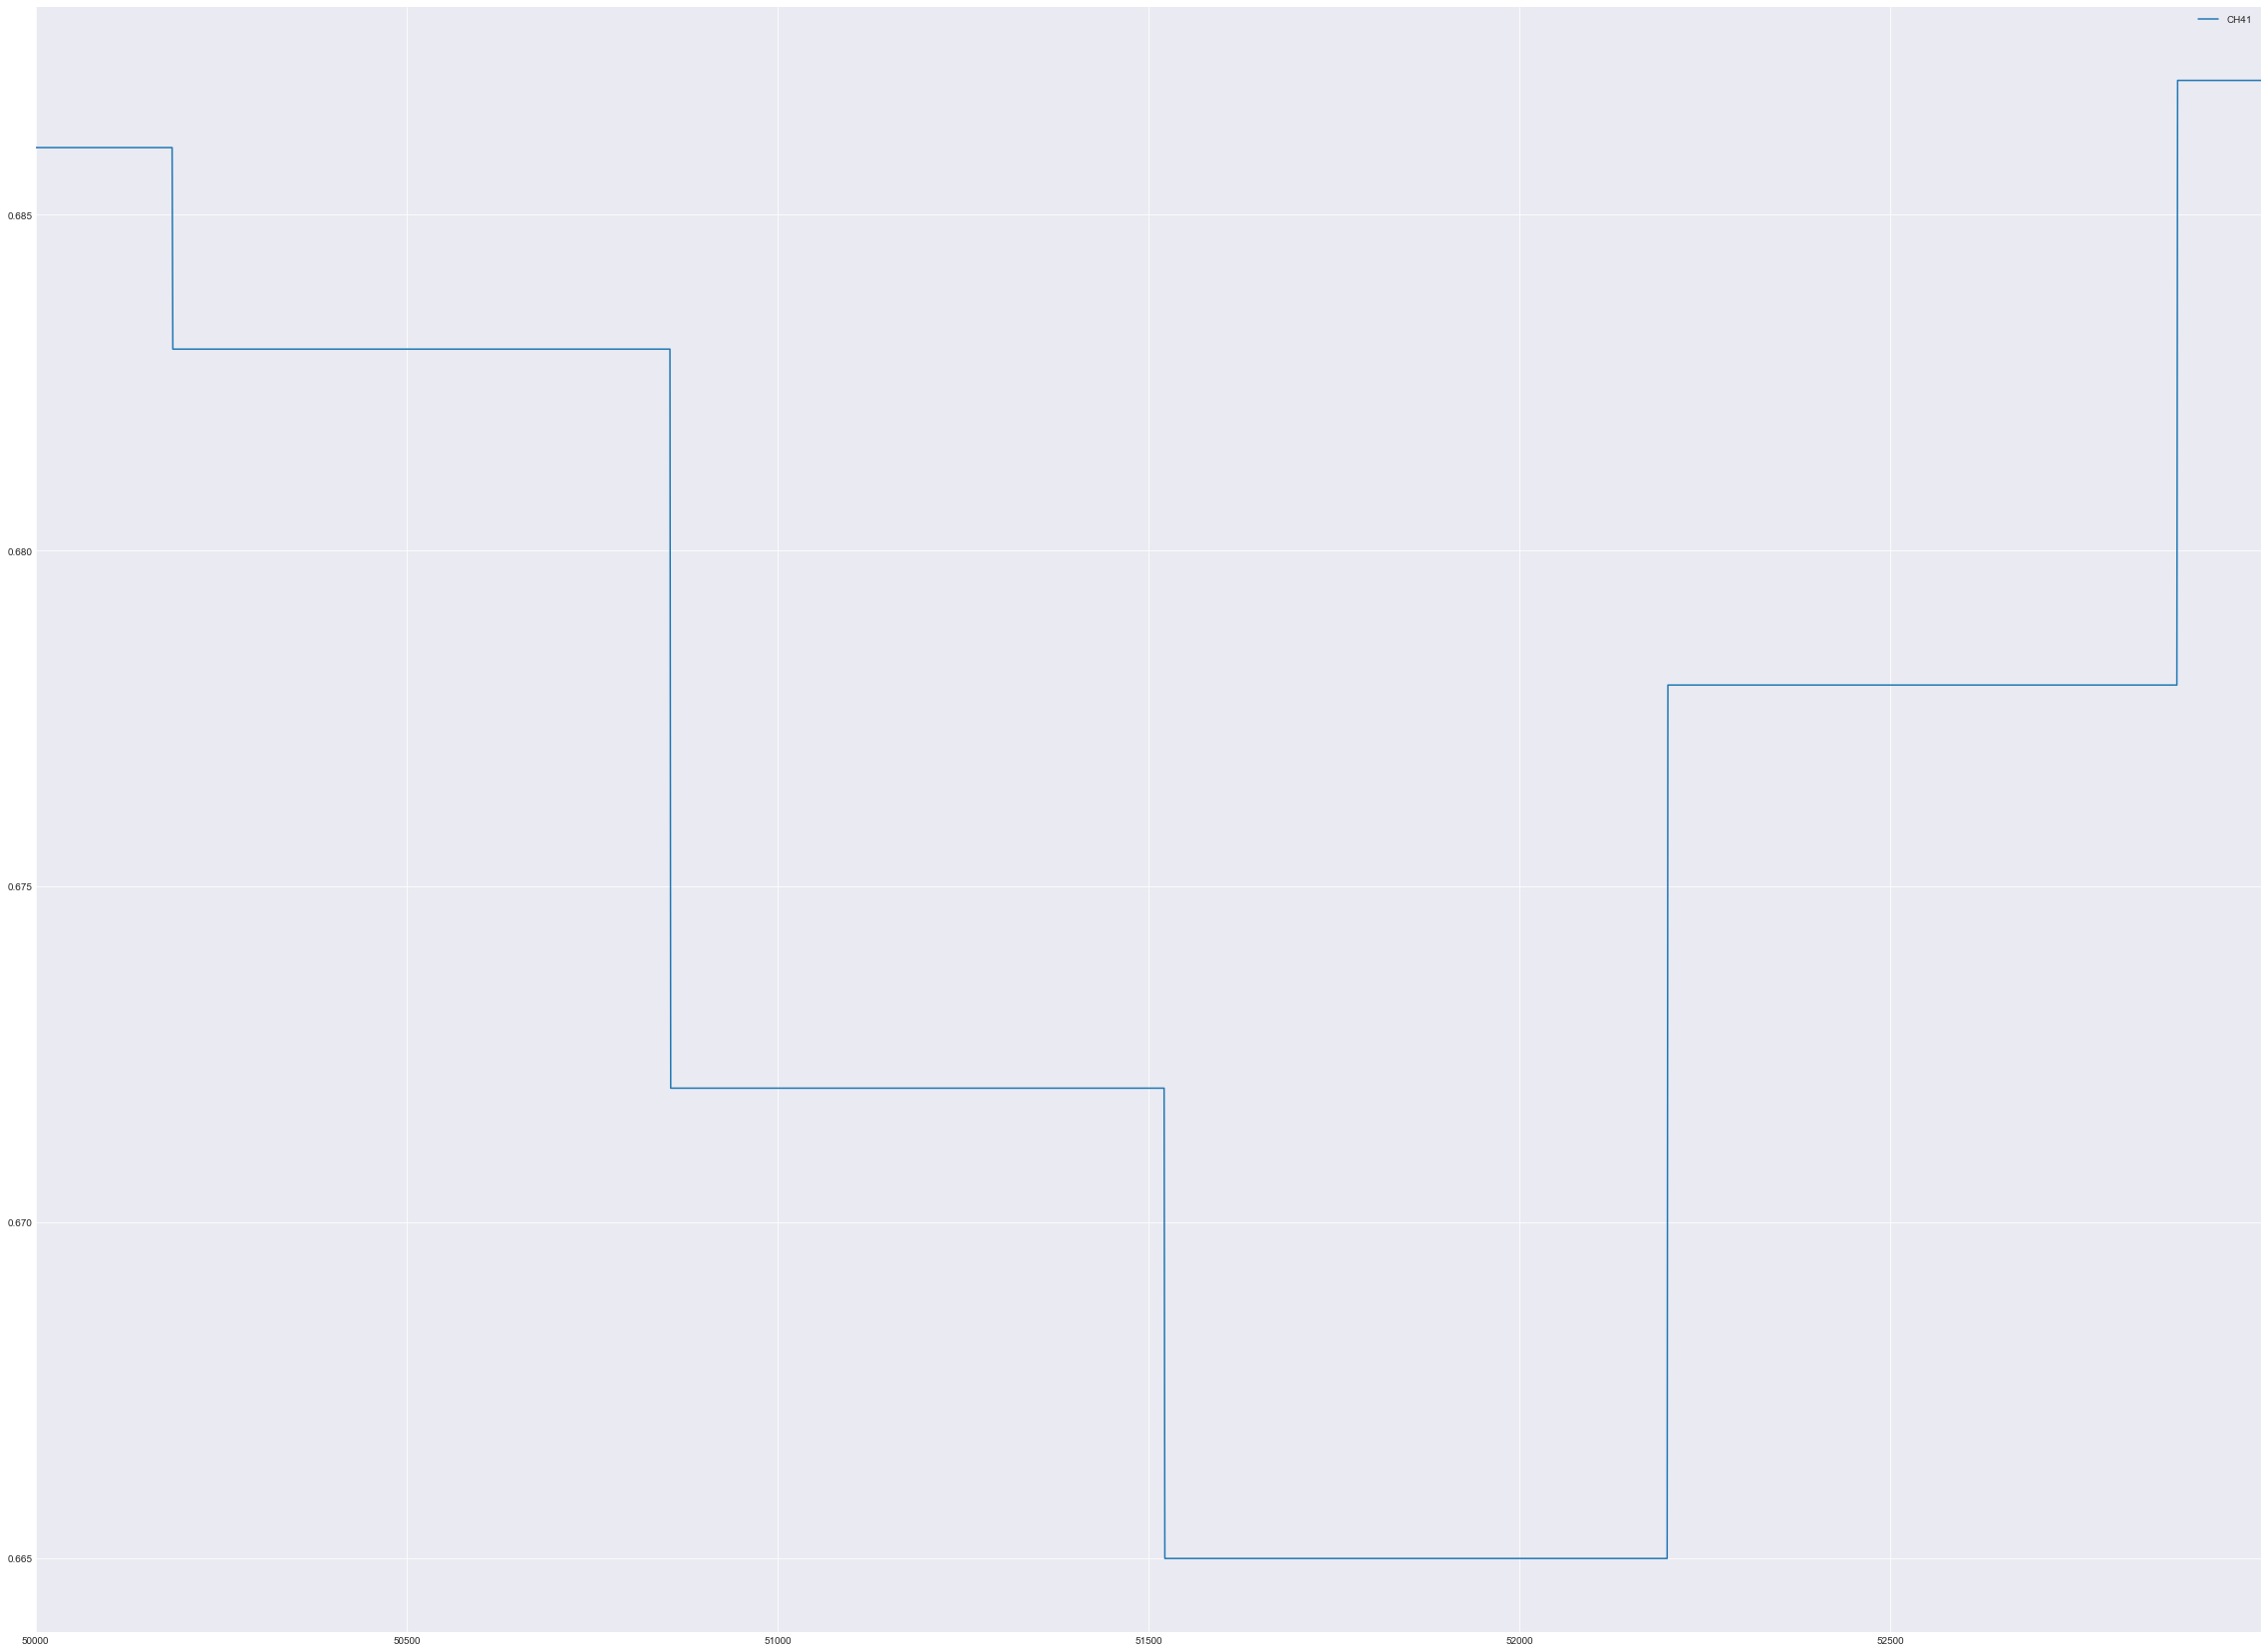

In [125]:
rr_intervals[50000:53000].plot()

In [126]:
import matplotlib.pyplot as plt

In [127]:
%pylab inline
pylab.rcParams['figure.figsize']= (40.0,30.0) #creating bigger figure

Populating the interactive namespace from numpy and matplotlib


/Users/kaufmann/anaconda3/envs/bh/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


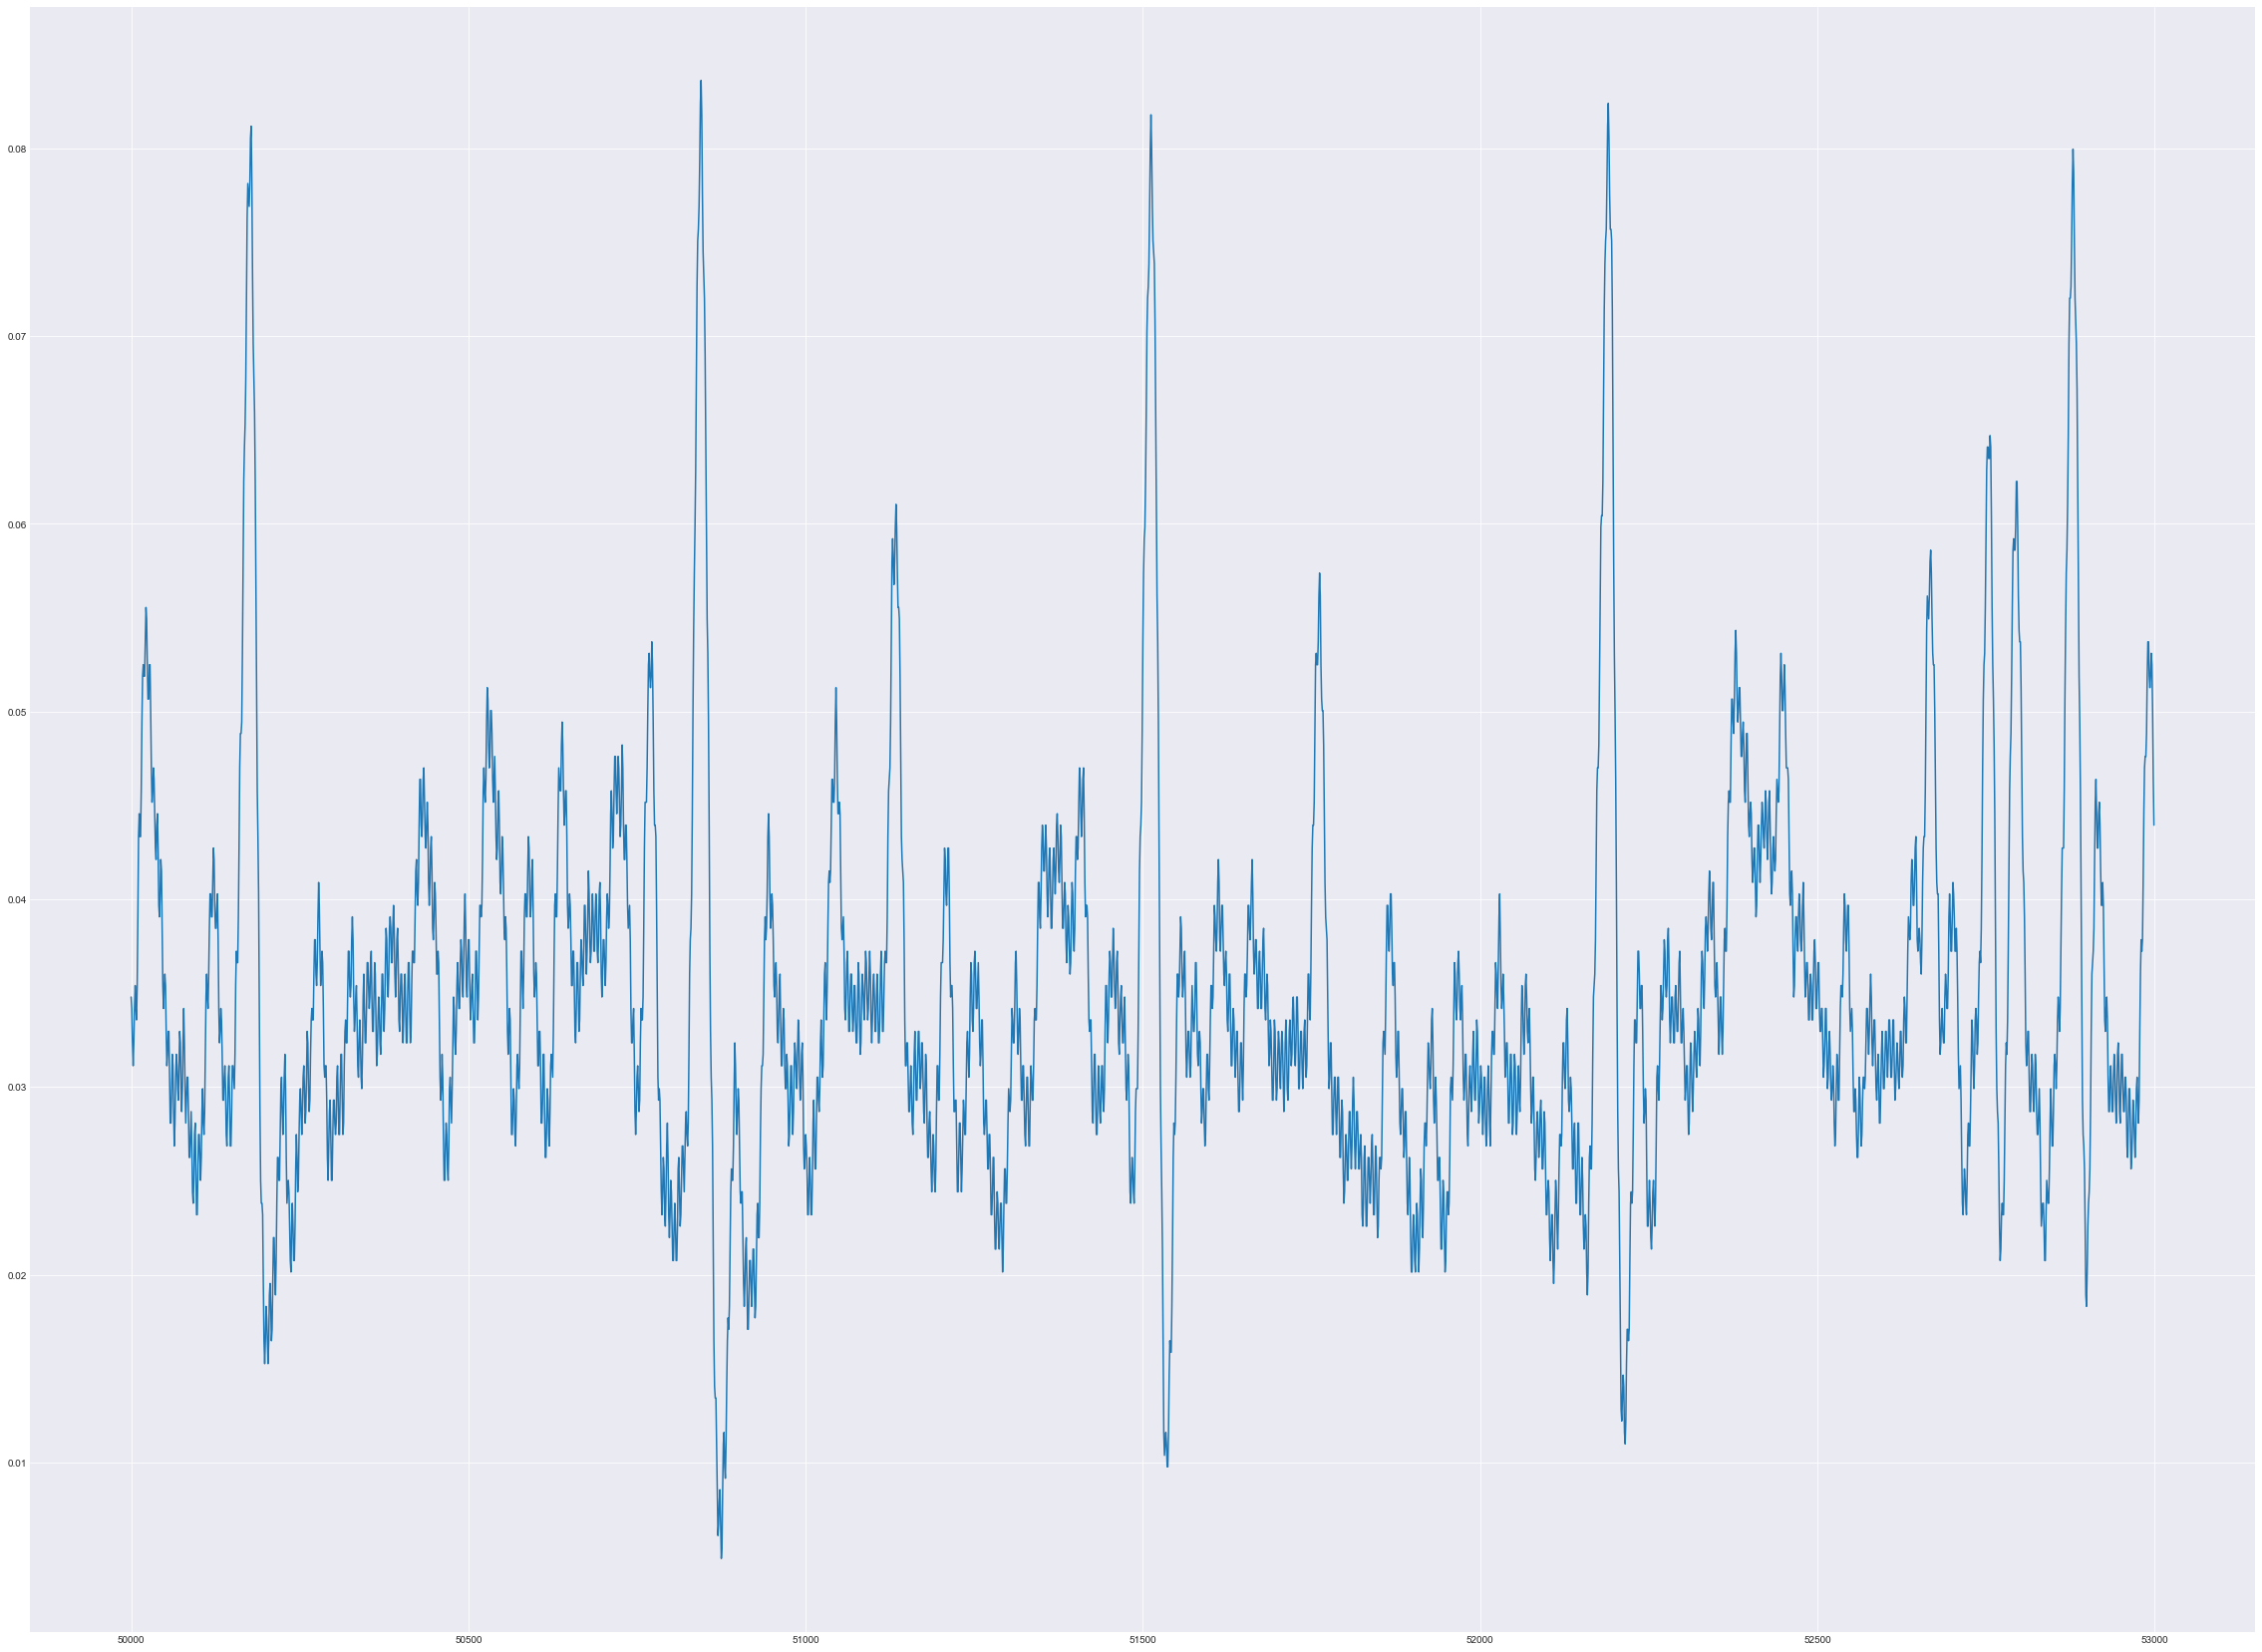

In [128]:
plt.plot(ecg_data[50000:53000])

In [170]:
df_polar=pd.read_csv('./data/M/_slash_polar.csv',header=[0])

In [278]:
#df_polar.columns = ['NA', 'hr_min_sec_ms__bpm__rr']
df_polar.head() #data from Polar device has been streamed as string and needs to be pre-processed and disected 

,rosbagTimestamp,data
0,36000000,"""15_07_51_723, 85, 689"""
1,172000000,"""15_07_52_712, 86, 685"""
2,334000000,"""15_07_53_702, 86, 700"""
3,457000000,"""15_07_54_692, 86, 731"""
4,566000000,"""15_07_55_682, 84, 777"""


In [230]:
polar_t_bpm_rr=df_polar['data'].str.split(',', expand=True)
#rename header
polar_t_bpm_rr.columns=['t','bpm','rr']
polar_t_bpm_rr['rosbagTimestamp']=df_polar['rosbagTimestamp']

In [231]:
polar_t_bpm_rr['rr']=polar_t_bpm_rr['rr'].str.replace('"', '')
polar_t_bpm_rr.tail()

,t,bpm,rr,rosbagTimestamp
452,"""15_15_23_664",87,740,196198000000
453,"""15_15_24_654",86,728,196821000000
454,"""15_15_25_644",87,699,197325000000
455,"""15_15_26_634",89,661,197832000000
456,"""15_15_27_624",89,651,198380000000


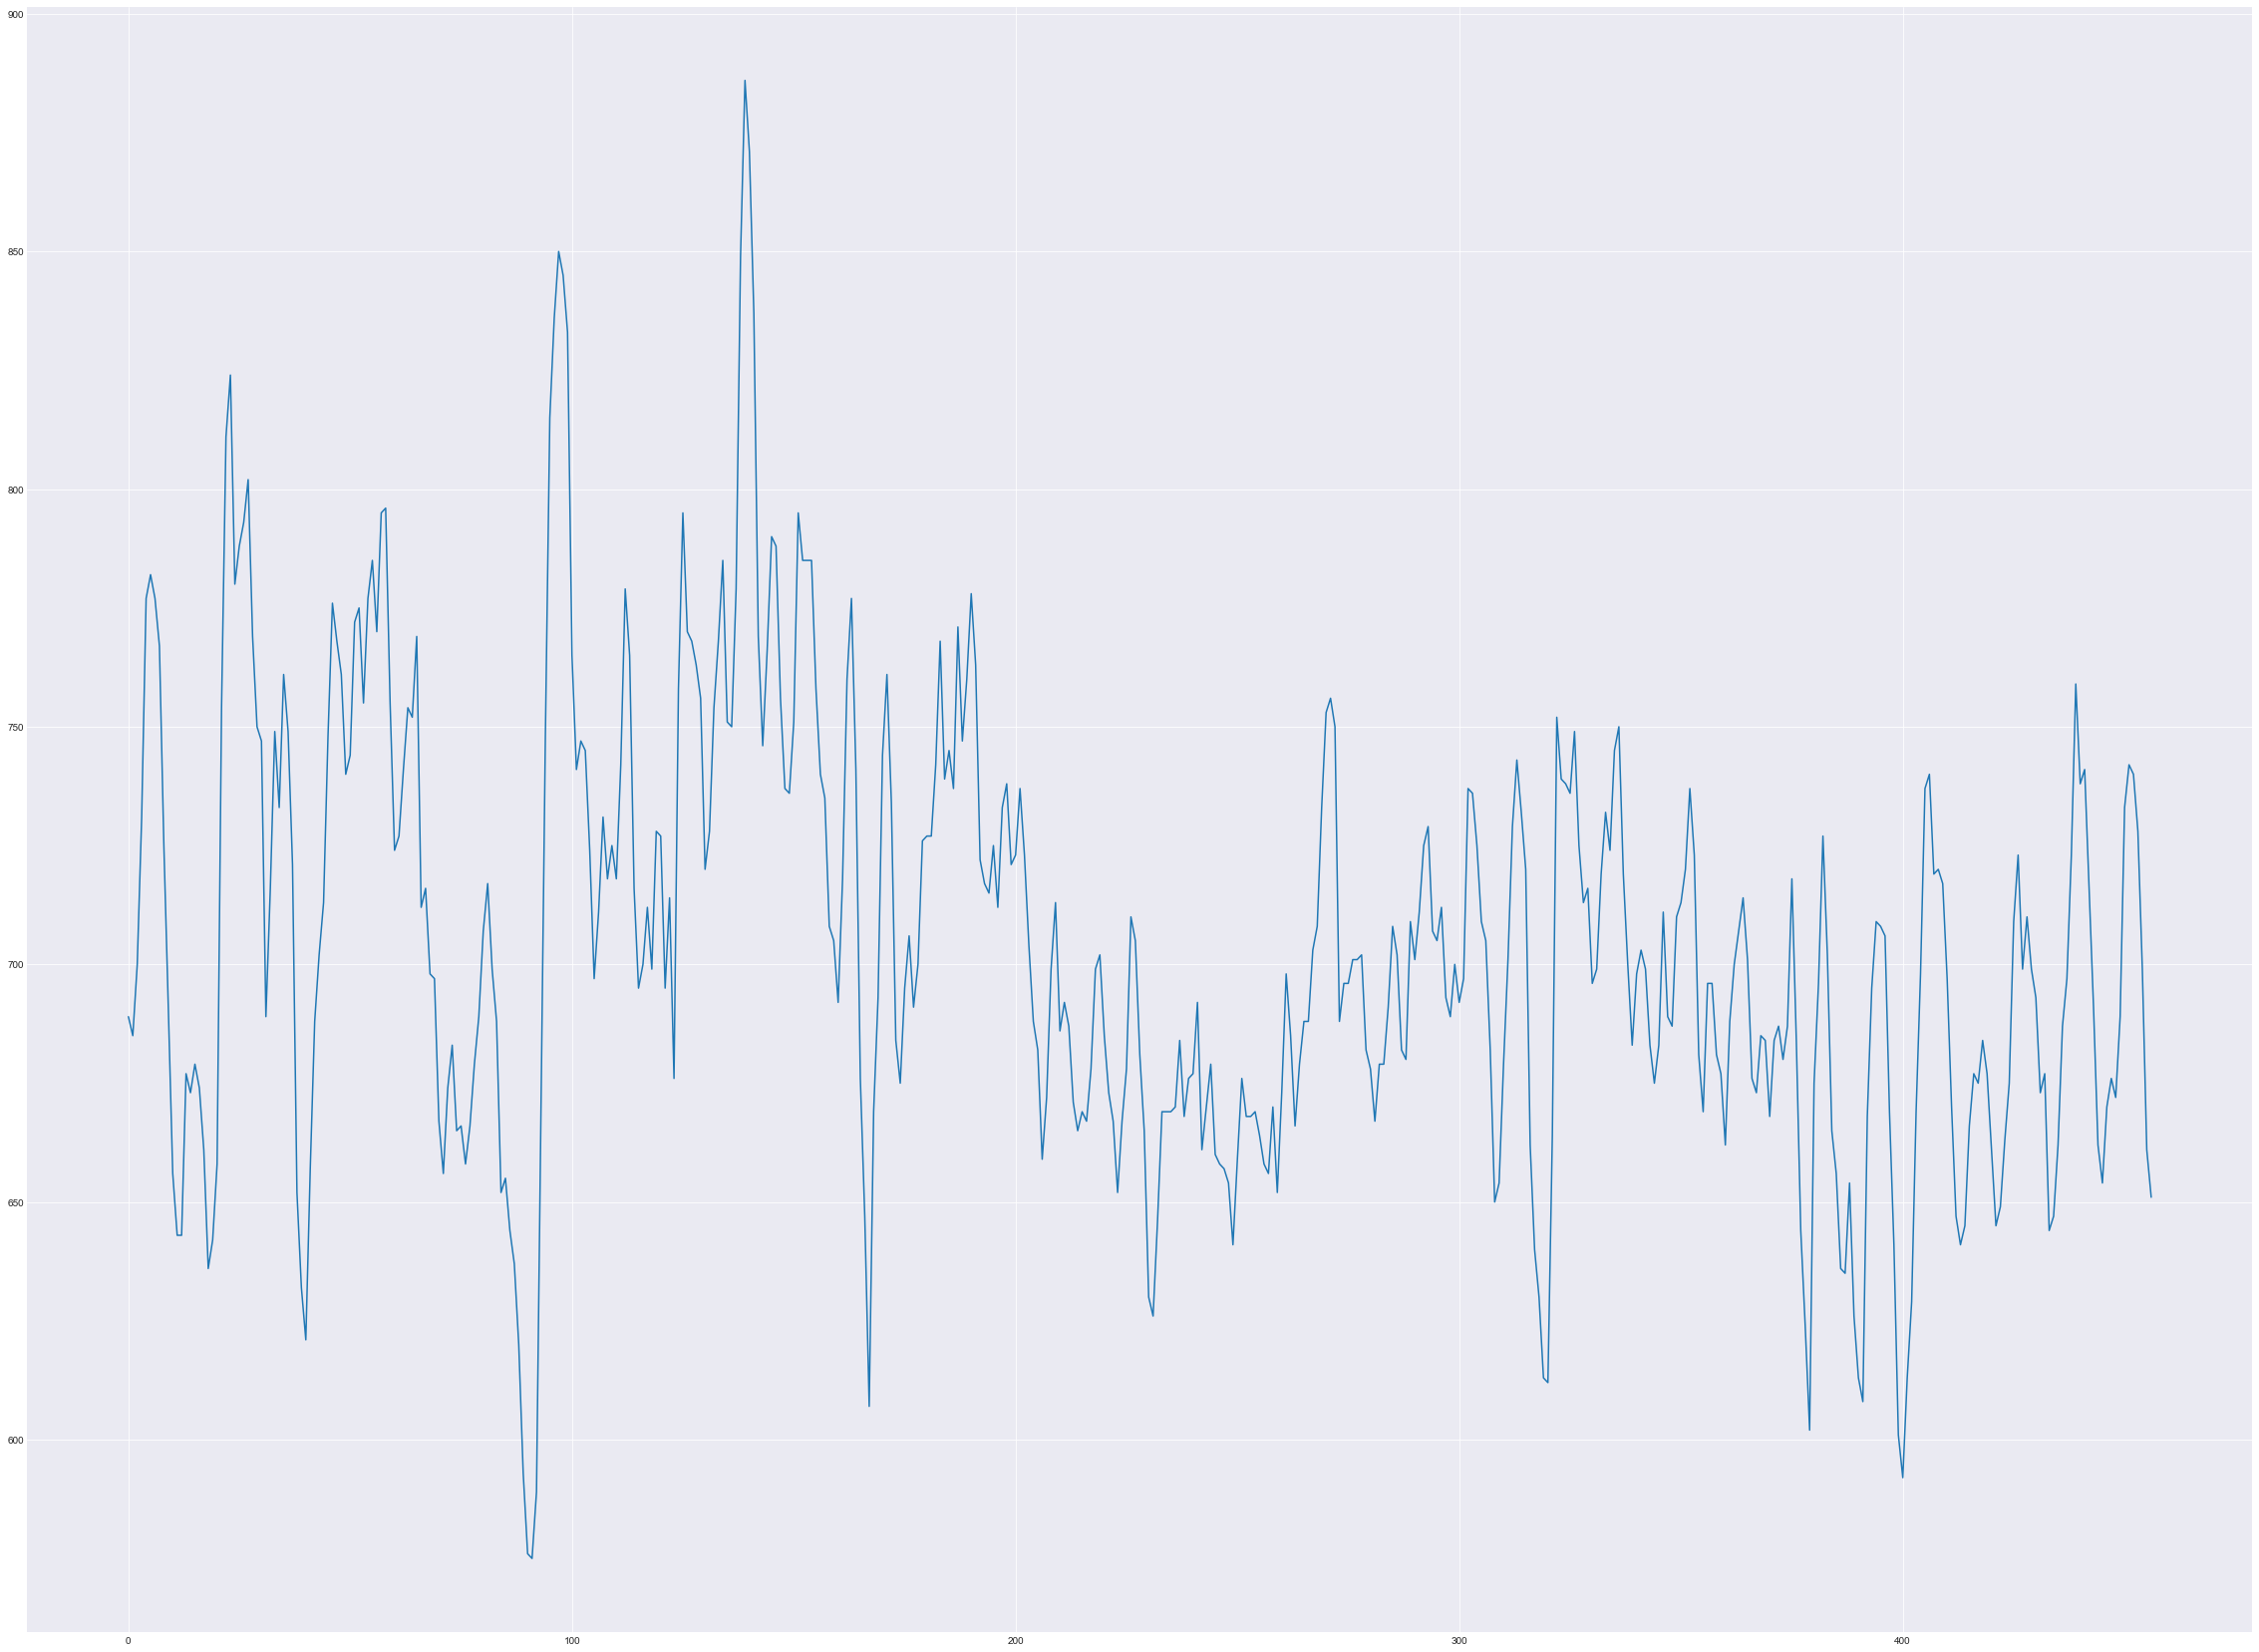

In [174]:
polar_t_bpm_rr['rr']=polar_t_bpm_rr['rr'].astype(int)
polar_t_bpm_rr['bpm']=polar_t_bpm_rr['bpm'].astype(int)
plt.plot(polar_t_bpm_rr['rr'])

In [175]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values

from hrvanalysis import get_time_domain_features, plot_psd, plot_distrib

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=polar_t_bpm_rr['rr'],  low_rri=300, high_rri=2000)
# This replace outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")

# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replace ectopic beats nan values with linear interpolation
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

time_domain_features = get_time_domain_features(interpolated_nn_intervals)


0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.


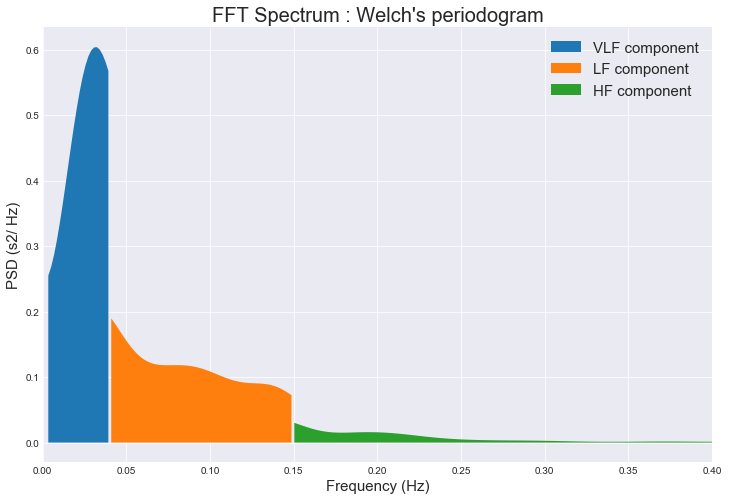

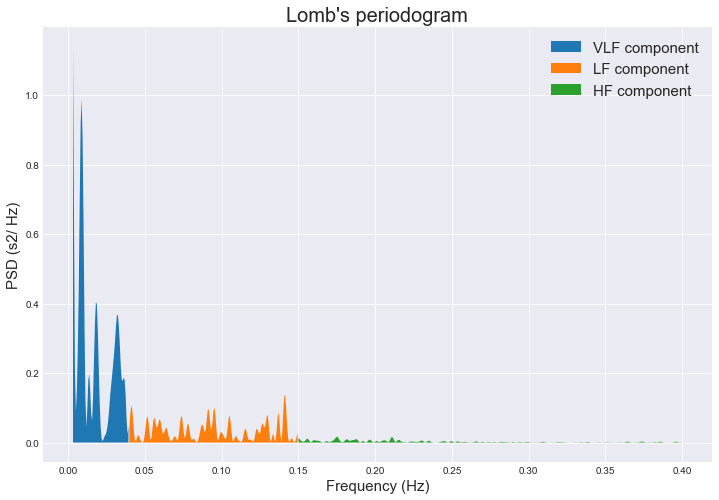

In [176]:
time_domain_features

plot_psd(interpolated_nn_intervals, method="welch")
plot_psd(interpolated_nn_intervals, method="lomb")

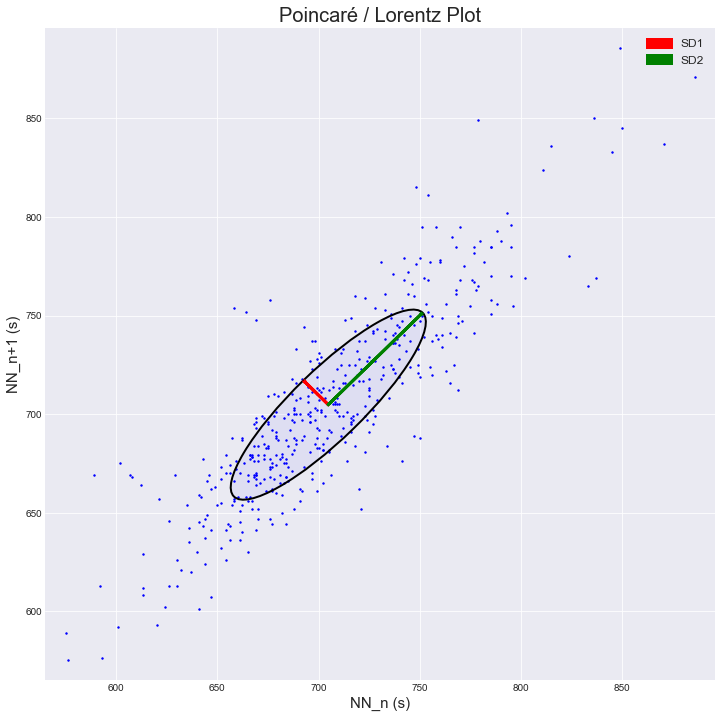

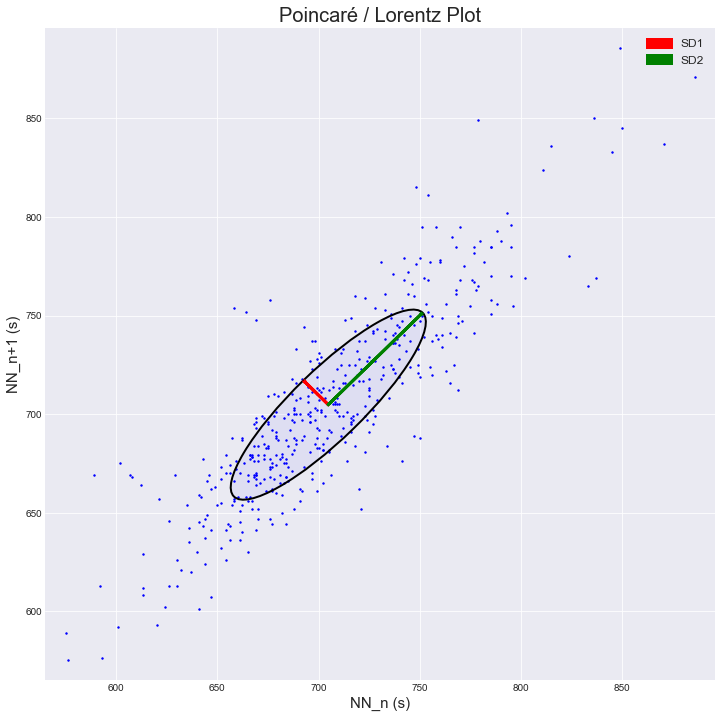

In [177]:
from hrvanalysis import plot_poincare


plot_poincare(interpolated_nn_intervals)
plot_poincare(interpolated_nn_intervals, plot_sd_features=True)

In [182]:
from hrv.classical import time_domain

rri = interpolated_rr_intervals
results = time_domain(rri)
print(results)

{'rmssd': 23.874764626377207, 'sdnn': 47.79455456476181, 'nn50': 21, 'pnn50': 4.595185995623632, 'mrri': 704.8052516411378, 'mhr': 85.51534712327309}


In [183]:
rriBioIn = [i * 1000 for i in list(rr_intervals['CH41'])]
rriBio = remove_outliers(rr_intervals=rriBioIn,  low_rri=300, high_rri=2000)
# This replace outliers nan values with linear interpolation
rri_interpol_bio = interpolate_nan_values(rr_intervals=rriBio, interpolation_method="linear")
rri_interpol_bio = np.asarray(rri_interpol_bio)
tmp = rri_interpol_bio[np.logical_not(np.isnan(rri_interpol_bio))]
rri_interpol_bio = tmp.tolist()
results = time_domain(rri_interpol_bio)
print(results)

1327 outlier(s) have been deleted.
The outlier(s) value(s) are : [301595000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [279]:
size(rri_interpol_bio)

300269

# Plotting RR intervals with different sampling rates in one plot



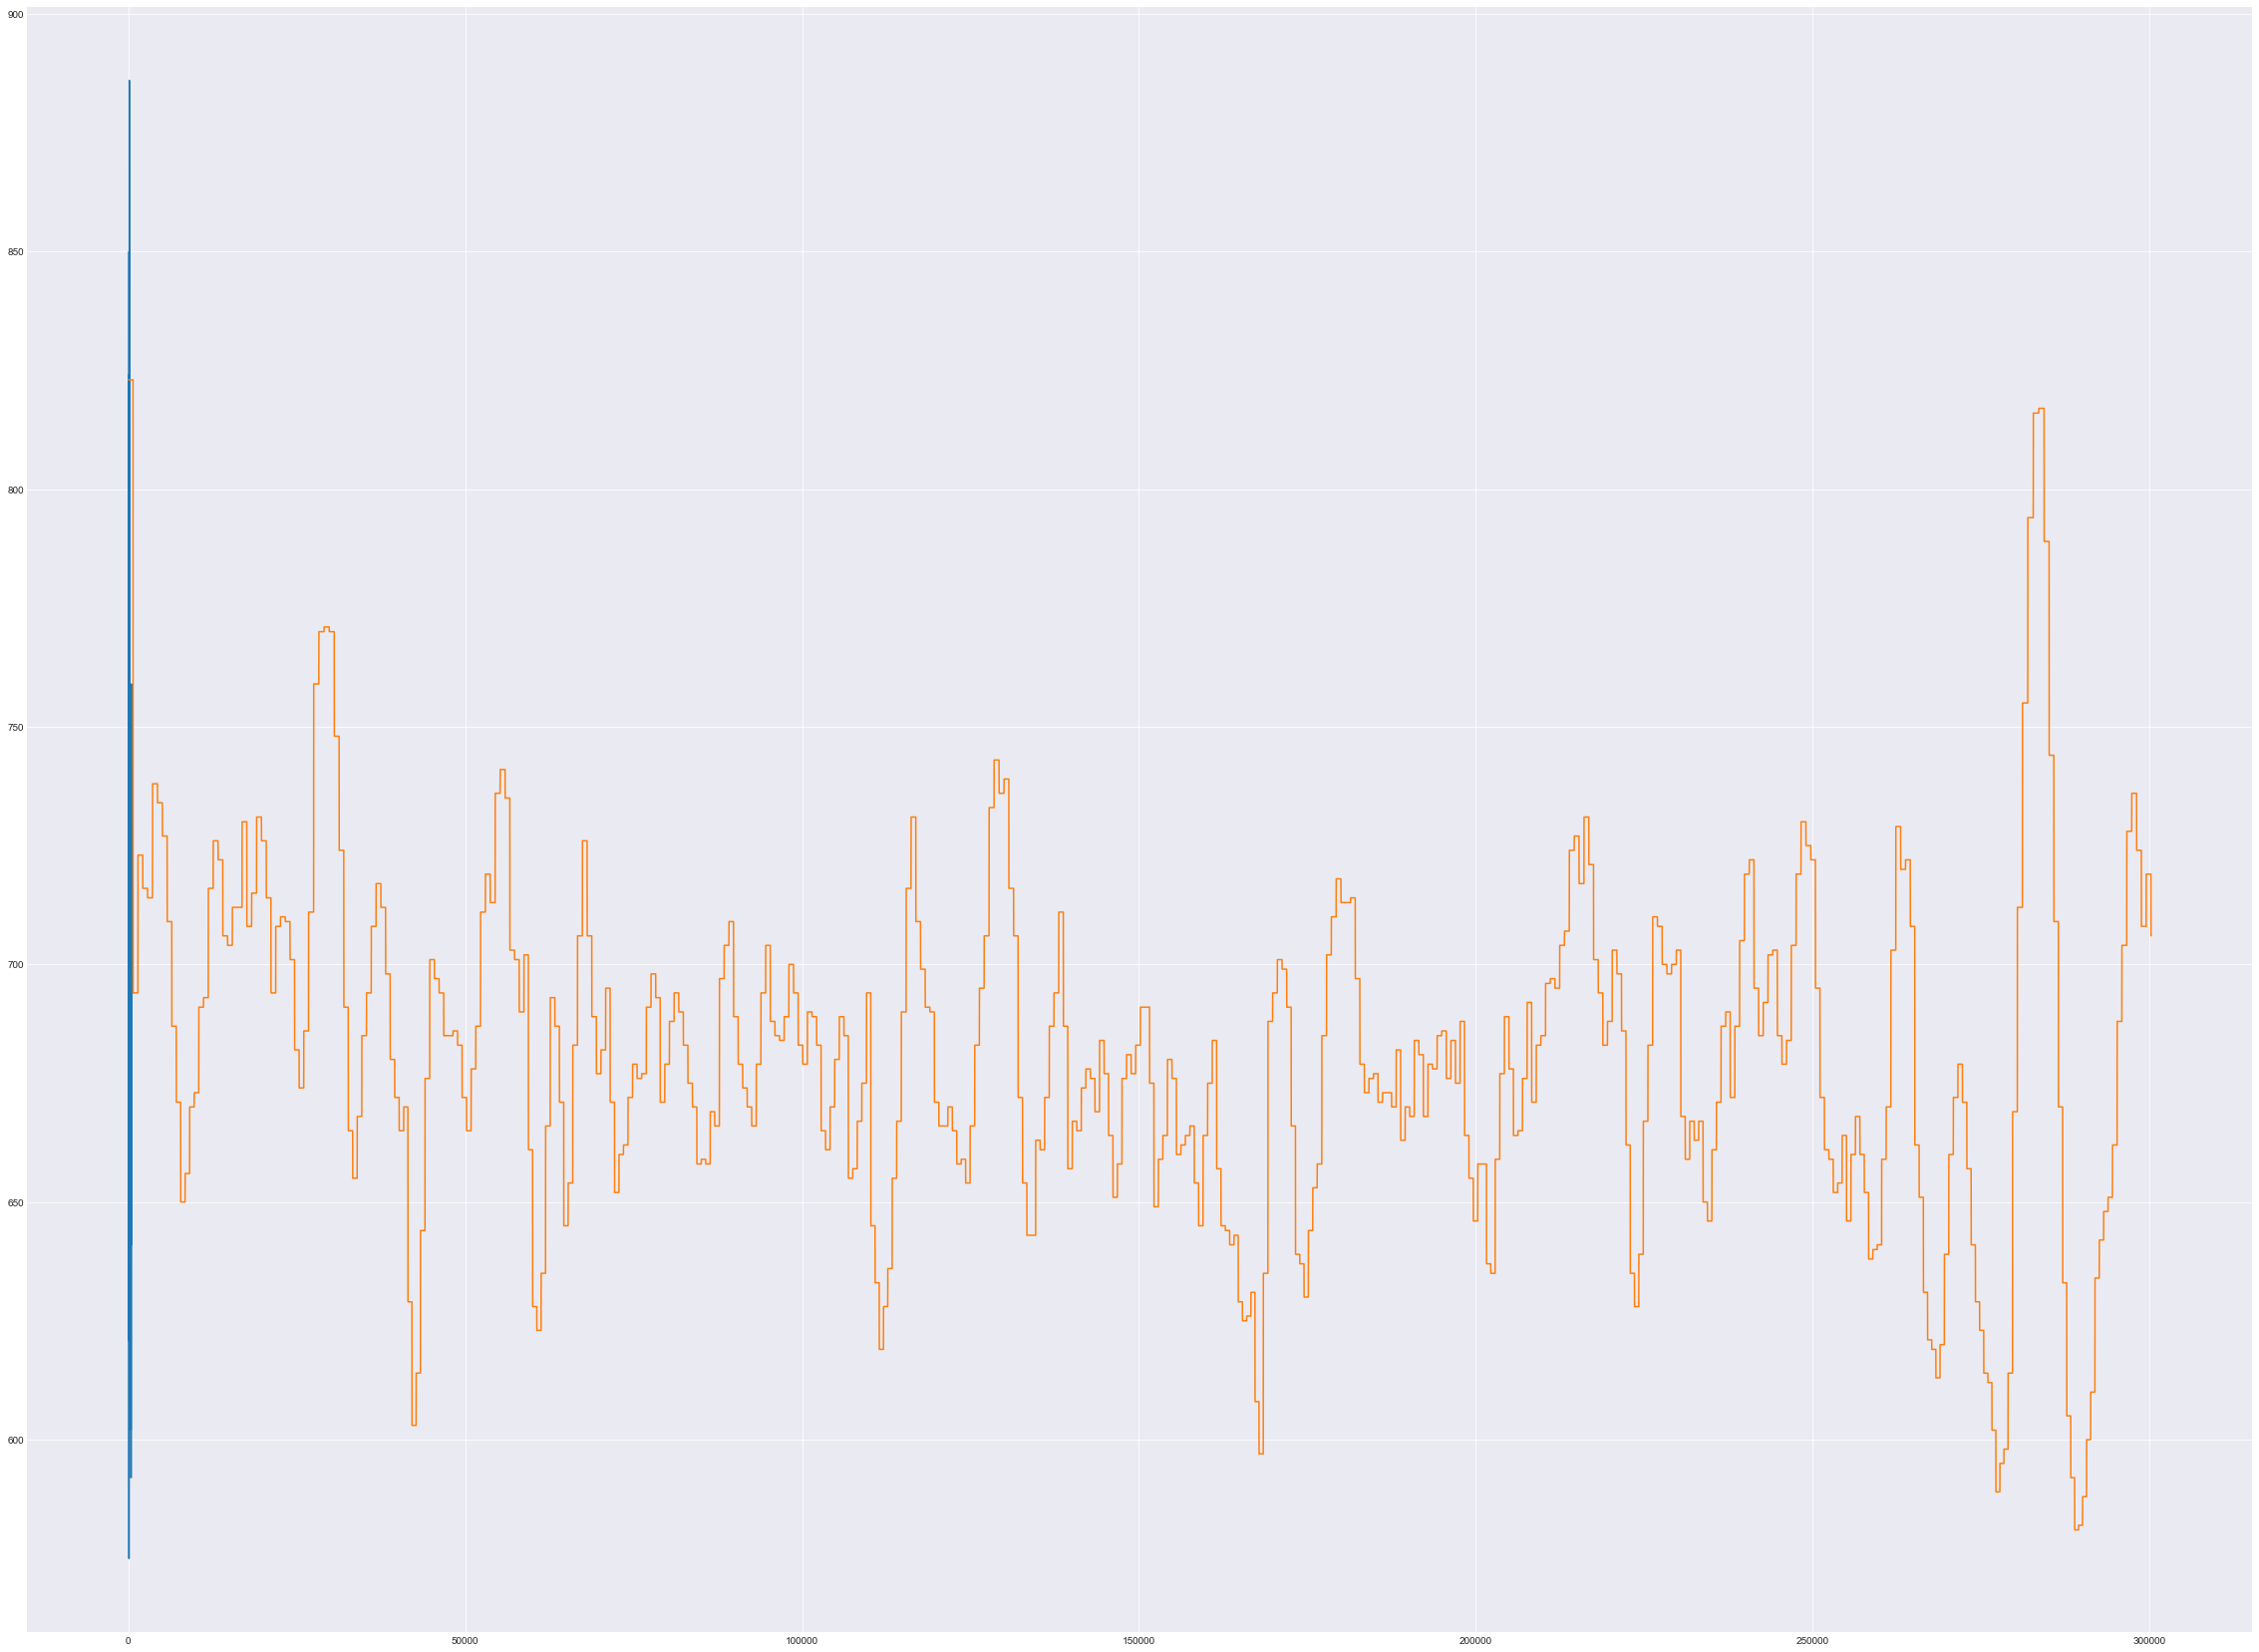

In [185]:
plt.plot(rri)
plt.plot(rri_interpol_bio)

# Dynamic Time Warping

In [186]:
from dtwalign import dtw

x = np.array(rri)
y = np.array(rri_interpol_bio)
res = dtw(x, y)
print(res)


/Users/kaufmann/anaconda3/envs/bh/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/kaufmann/anaconda3/envs/bh/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


/Users/kaufmann/anaconda3/envs/bh/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/kaufmann/anaconda3/envs/bh/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


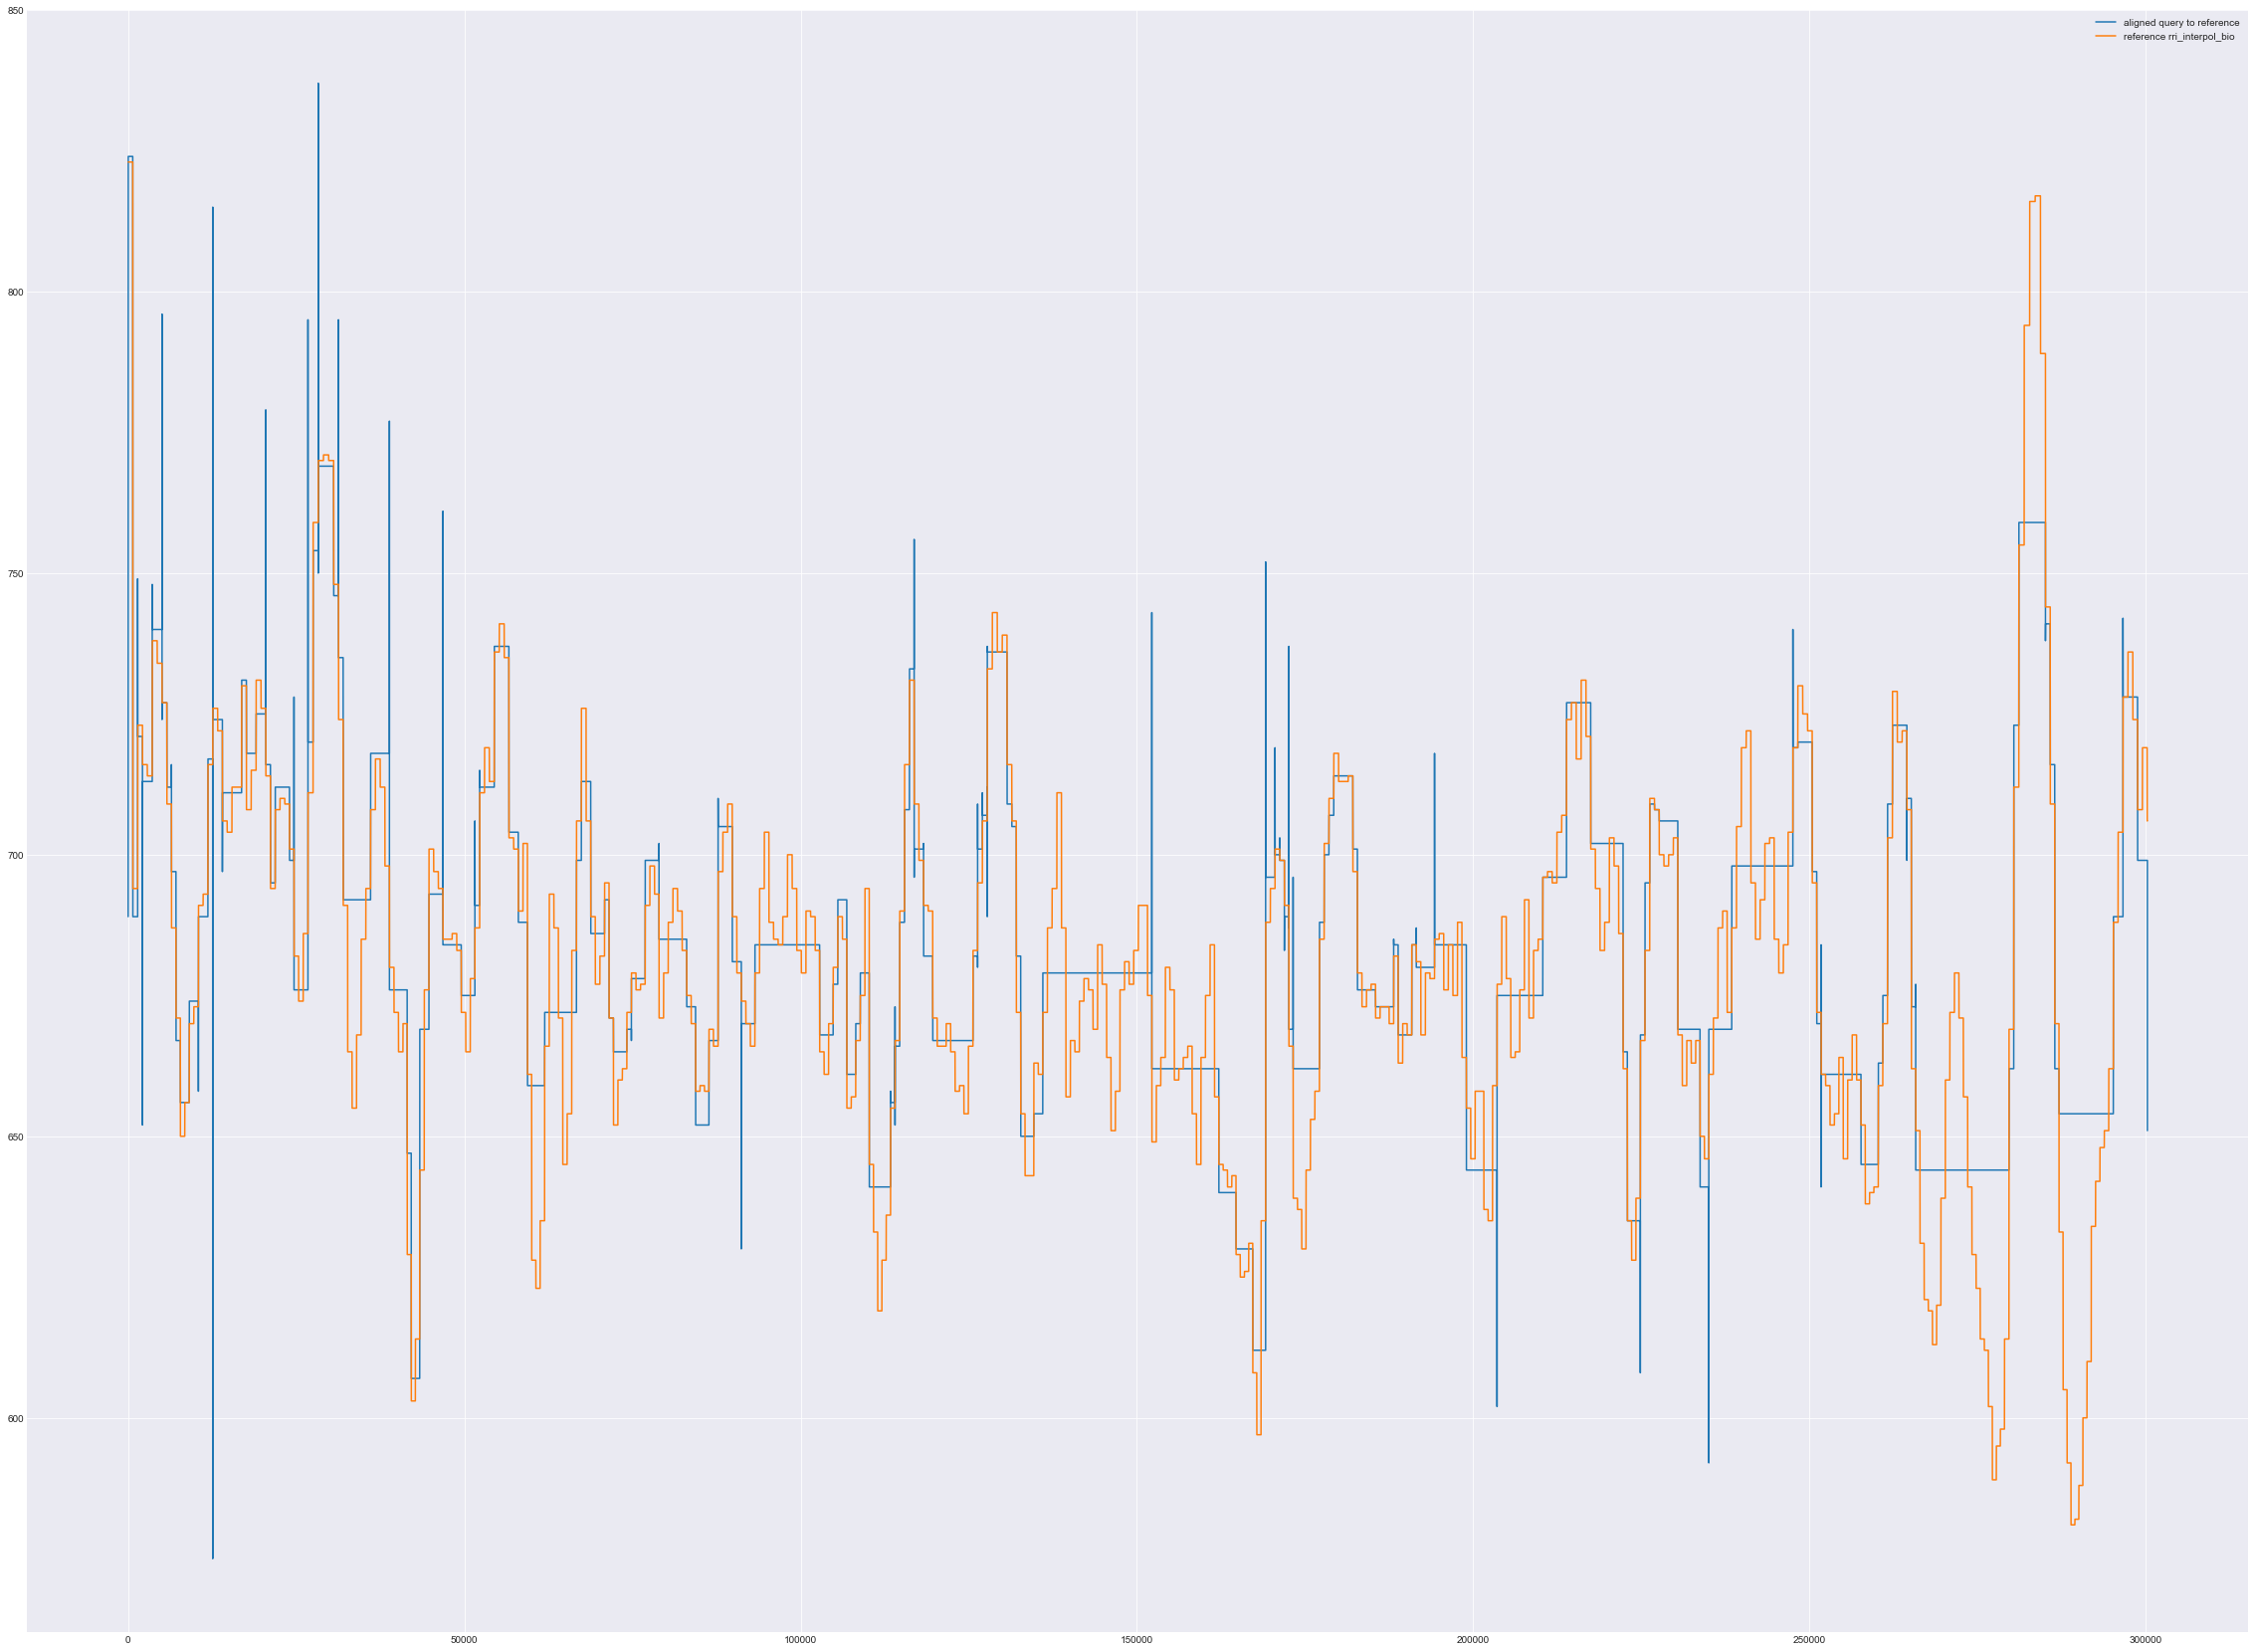

In [243]:
# warp x to y
x_warping_path = res.get_warping_path(target="query")
plt.plot(x[x_warping_path], label="aligned query to reference")
plt.plot(y, label="reference rri_interpol_bio")
plt.legend()

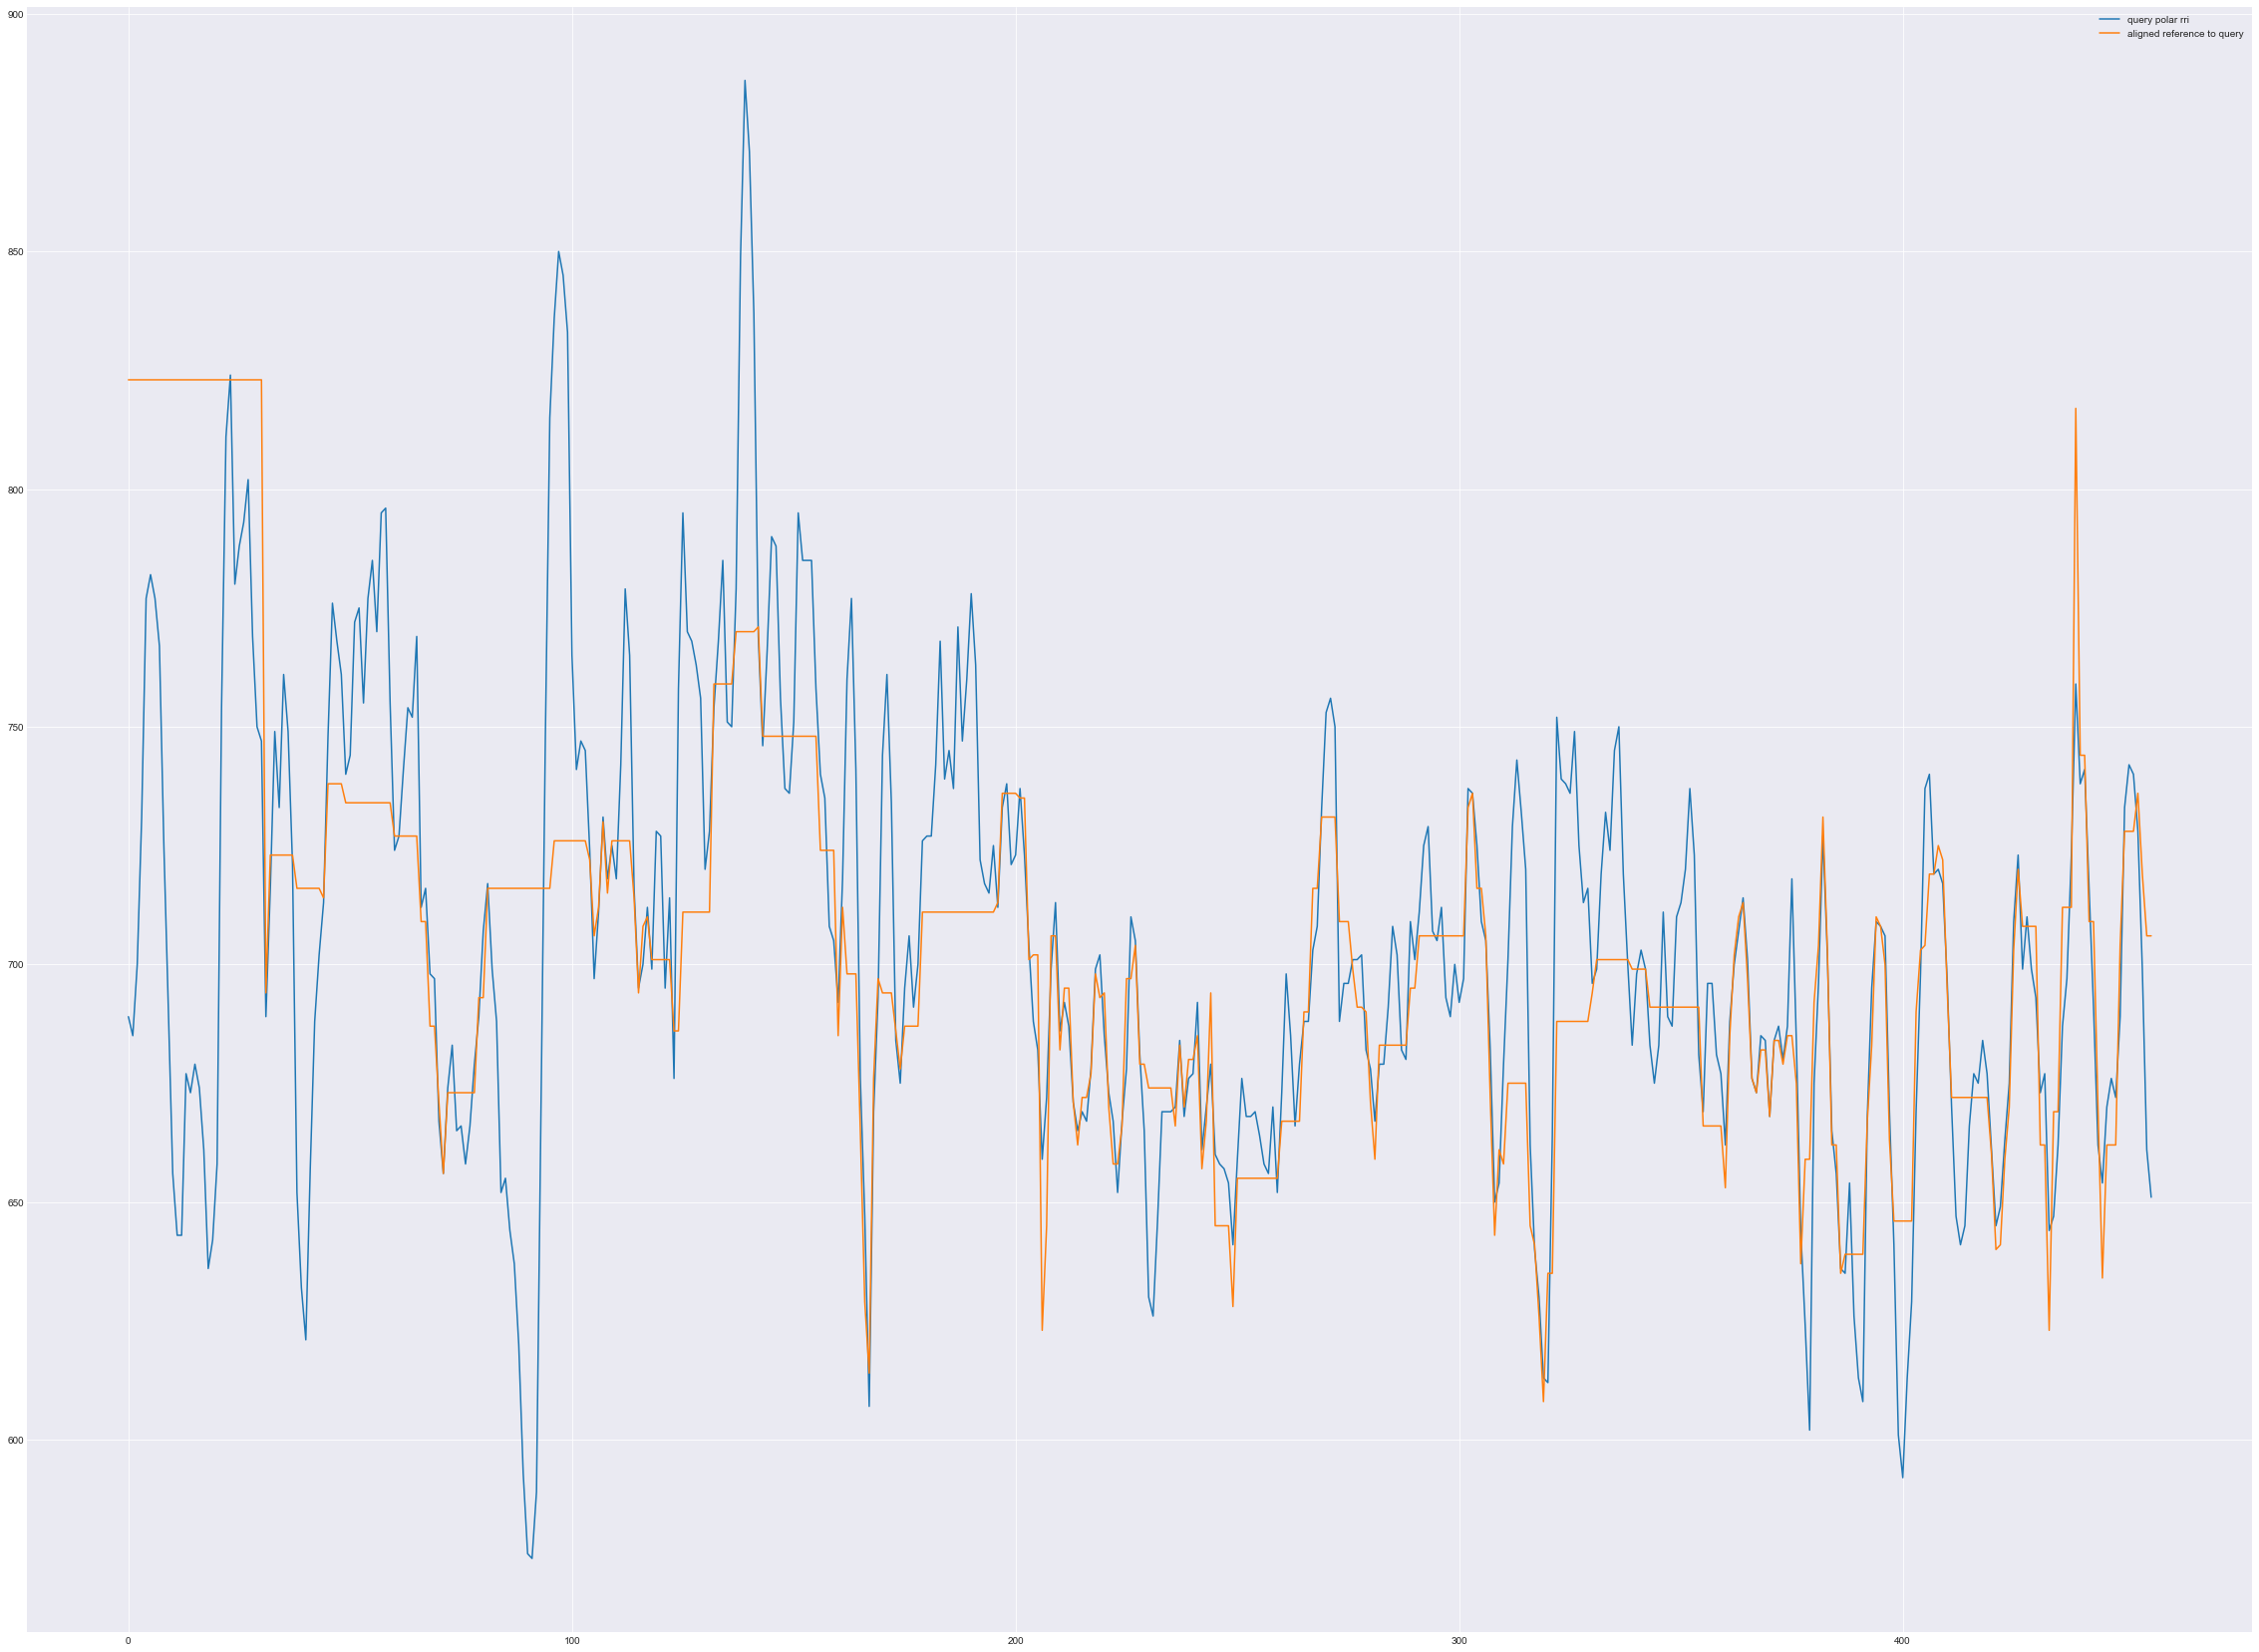

In [245]:
# warp y to x
y_warping_path = res.get_warping_path(target="reference")
plt.plot(x, label="query polar rri")
plt.plot(y[y_warping_path], label="aligned reference to query")
plt.legend()

In [248]:
#take biopac rri_interpol_bio and extract unique RR interval values
type(rri_interpol_bio)

list

In [261]:
def remove_adjacent(list_in):
  a = []
  for item in list_in:
    if len(a):
      if a[-1] != item:
        a.append(item)
    else: a.append(item)        
  return a

In [262]:
rri_interpol_bio_clean = remove_adjacent(rri_interpol_bio)

#### Plotting RR intervals for Polar (red) and cleaned Biopac (blue) with no repeating values

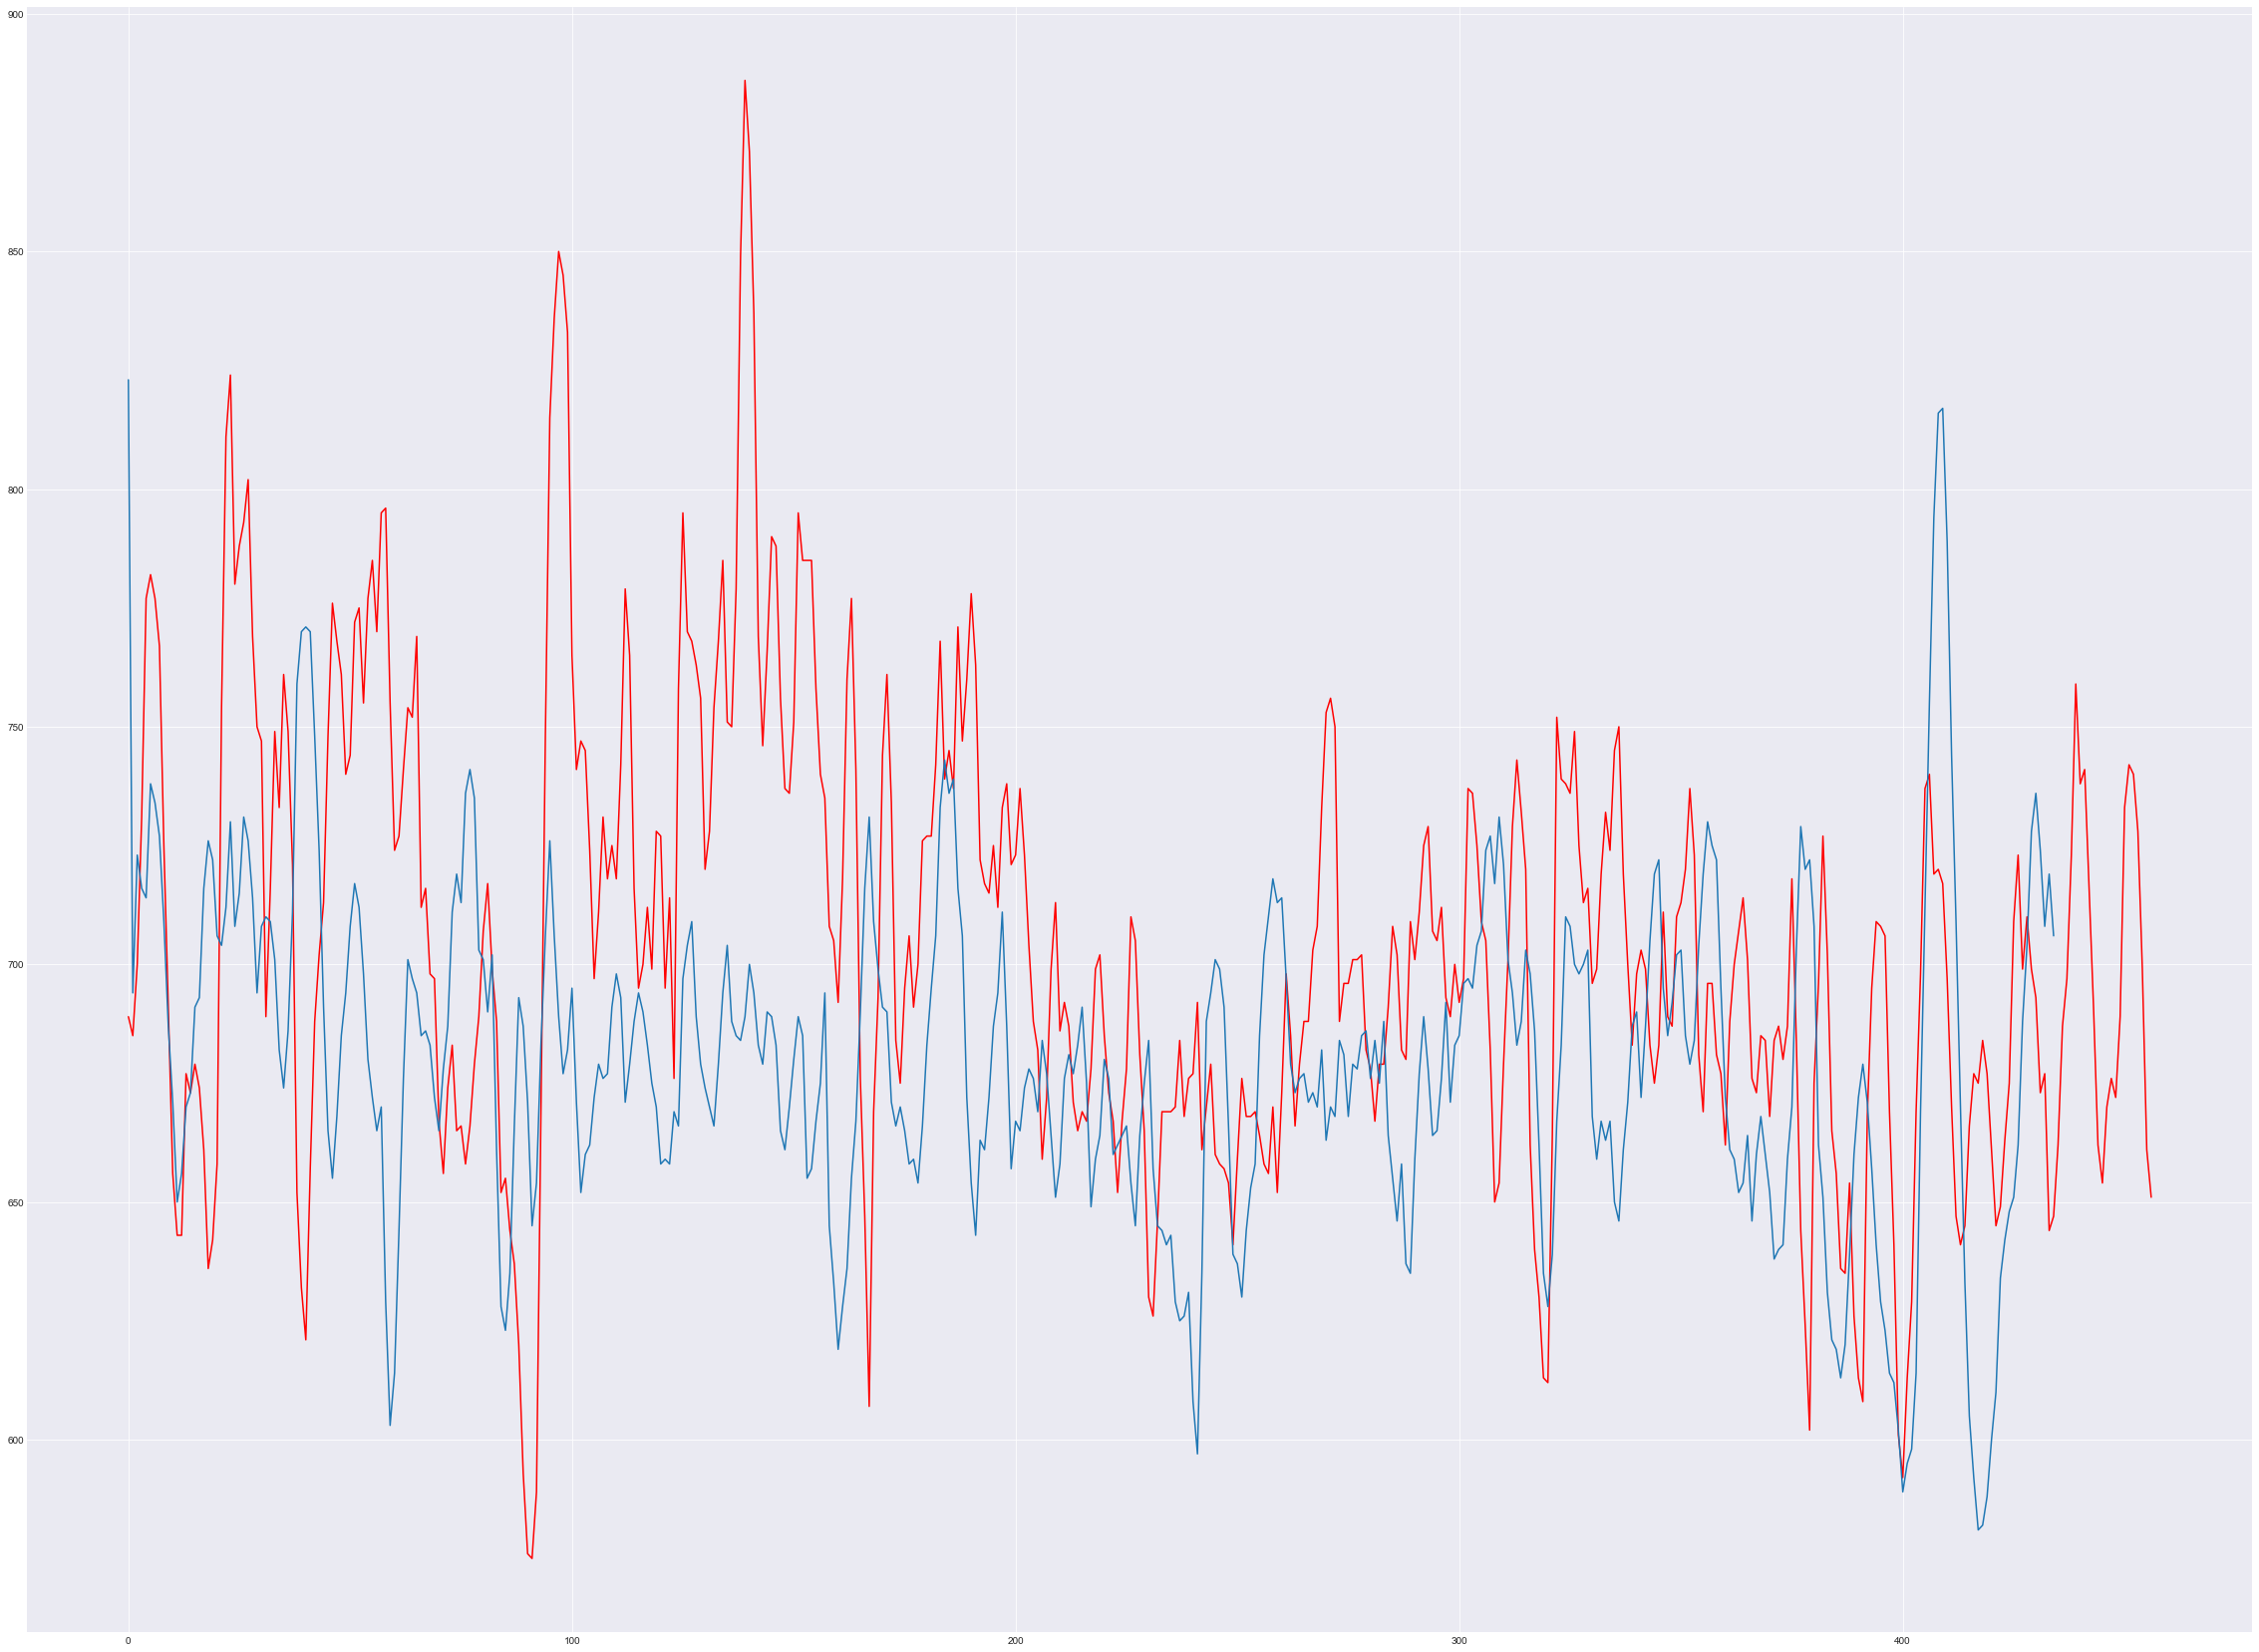

In [267]:
plt.plot(rri, label="POLAR RRI", color="red")
plt.plot(rri_interpol_bio_clean, label = "Biopac Cleaned")

# Pupillometry

In [190]:
fileNamePupil = '/Users/kaufmann/ecg_pupillometry_pipeline_kaufmann/data/M/_slash_pupil_info.csv'

In [191]:
df_pupil=pd.read_csv(fileNamePupil)

In [192]:
size(df_pupil)

404987

In [214]:
df_pupil

,rosbagTimestamp,timestamp,index,confidence,norm_pos,diameter,method,ellipse_center,ellipse_axis,ellipse_angle,luminance
0,36000000,5227.816895,0,0.999960,"[0.639847457408905, 0.47020789980888367]",25.254072,"""3d c++""","[122.8507080078125, 101.72007751464844]","[23.534671783447266, 25.254072189331055]",28.074808,0.0
1,36000000,5227.825195,0,0.998953,"[0.6399694085121155, 0.4697396457195282]",25.075302,"""3d c++""","[122.87413024902344, 101.80998992919922]","[23.356853485107422, 25.075302124023438]",28.273420,0.0
2,36000000,5227.833008,0,0.991190,"[0.640379011631012, 0.4701277017593384]",25.548952,"""3d c++""","[122.95276641845703, 101.73548126220703]","[23.791217803955078, 25.548952102661133]",27.974579,0.0
3,36000000,5227.849121,0,0.998882,"[0.6408166289329529, 0.4692140519618988]",25.331190,"""3d c++""","[123.03678894042969, 101.91090393066406]","[23.55978775024414, 25.33119010925293]",28.307131,0.0
4,36000000,5227.865234,0,0.999969,"[0.6403920650482178, 0.4695734679698944]",25.457756,"""3d c++""","[122.95526885986328, 101.84188842773438]","[23.696727752685547, 25.45775604248047]",28.243423,0.0
5,36000000,5227.873535,0,0.999914,"[0.6403698325157166, 0.4696851372718811]",25.309507,"""3d c++""","[122.95101165771484, 101.8204574584961]","[23.56144905090332, 25.309507369995117]",28.194435,0.0
6,36000000,5227.881348,0,0.954765,"[0.6407966017723083, 0.4700009226799011]",25.466930,"""3d c++""","[123.03294372558594, 101.75982666015625]","[23.699745178222656, 25.466930389404297]",27.927654,0.0
7,36000000,5227.897461,0,0.999506,"[0.641054630279541, 0.46928349137306213]",25.370363,"""3d c++""","[123.08248901367188, 101.89756774902344]","[23.58989143371582, 25.370363235473633]",28.210867,0.0
8,36000000,5227.905762,0,0.999766,"[0.6406282186508179, 0.4696866273880005]",25.410694,"""3d c++""","[123.00061798095703, 101.8201675415039]","[23.64749526977539, 25.410694122314453]",28.125786,0.0
9,36000000,5227.921875,0,0.999914,"[0.6410154700279236, 0.46956732869148254]",25.493172,"""3d c++""","[123.0749740600586, 101.84307098388672]","[23.70997428894043, 25.49317169189453]",28.082796,0.0


In [208]:
df_polar['rosbagTimestamp'].head

<bound method NDFrame.head of 0          36000000
1         172000000
2         334000000
3         457000000
4         566000000
           ...     
452    196198000000
453    196821000000
454    197325000000
455    197832000000
456    198380000000
Name: rosbagTimestamp, Length: 457, dtype: int64>

In [209]:
df_pupil['rosbagTimestamp'].head


<bound method NDFrame.head of 0            36000000
1            36000000
2            36000000
3            36000000
4            36000000
             ...     
36812    198740000000
36813    198745000000
36814    198755000000
36815    198765000000
36816    198779000000
Name: rosbagTimestamp, Length: 36817, dtype: int64>

In [272]:
size(polar_t_bpm_rr['rosbagTimestamp'][0:435])

435

In [ ]:
rri_interpol_bio_clean_ms = [i / 1000 for i in rri_interpol_bio_clean]

In [276]:
plt.plot(df_pupil['rosbagTimestamp'],df_pupil['diameter'], label="PUPIL_DIAMETER")
plt.plot(polar_t_bpm_rr['rosbagTimestamp'],polar_t_bpm_rr['bpm'], label="POLAR_RAW_BPM")
#DIRTY TESTING
plt.plot(polar_t_bpm_rr['rosbagTimestamp'][0:435],rri_interpol_bio_clean,_ms label="POLAR_RAW_BPM")
plt.legend()

SyntaxError: invalid syntax (<ipython-input-276-99d9af4f1738>, line 4)

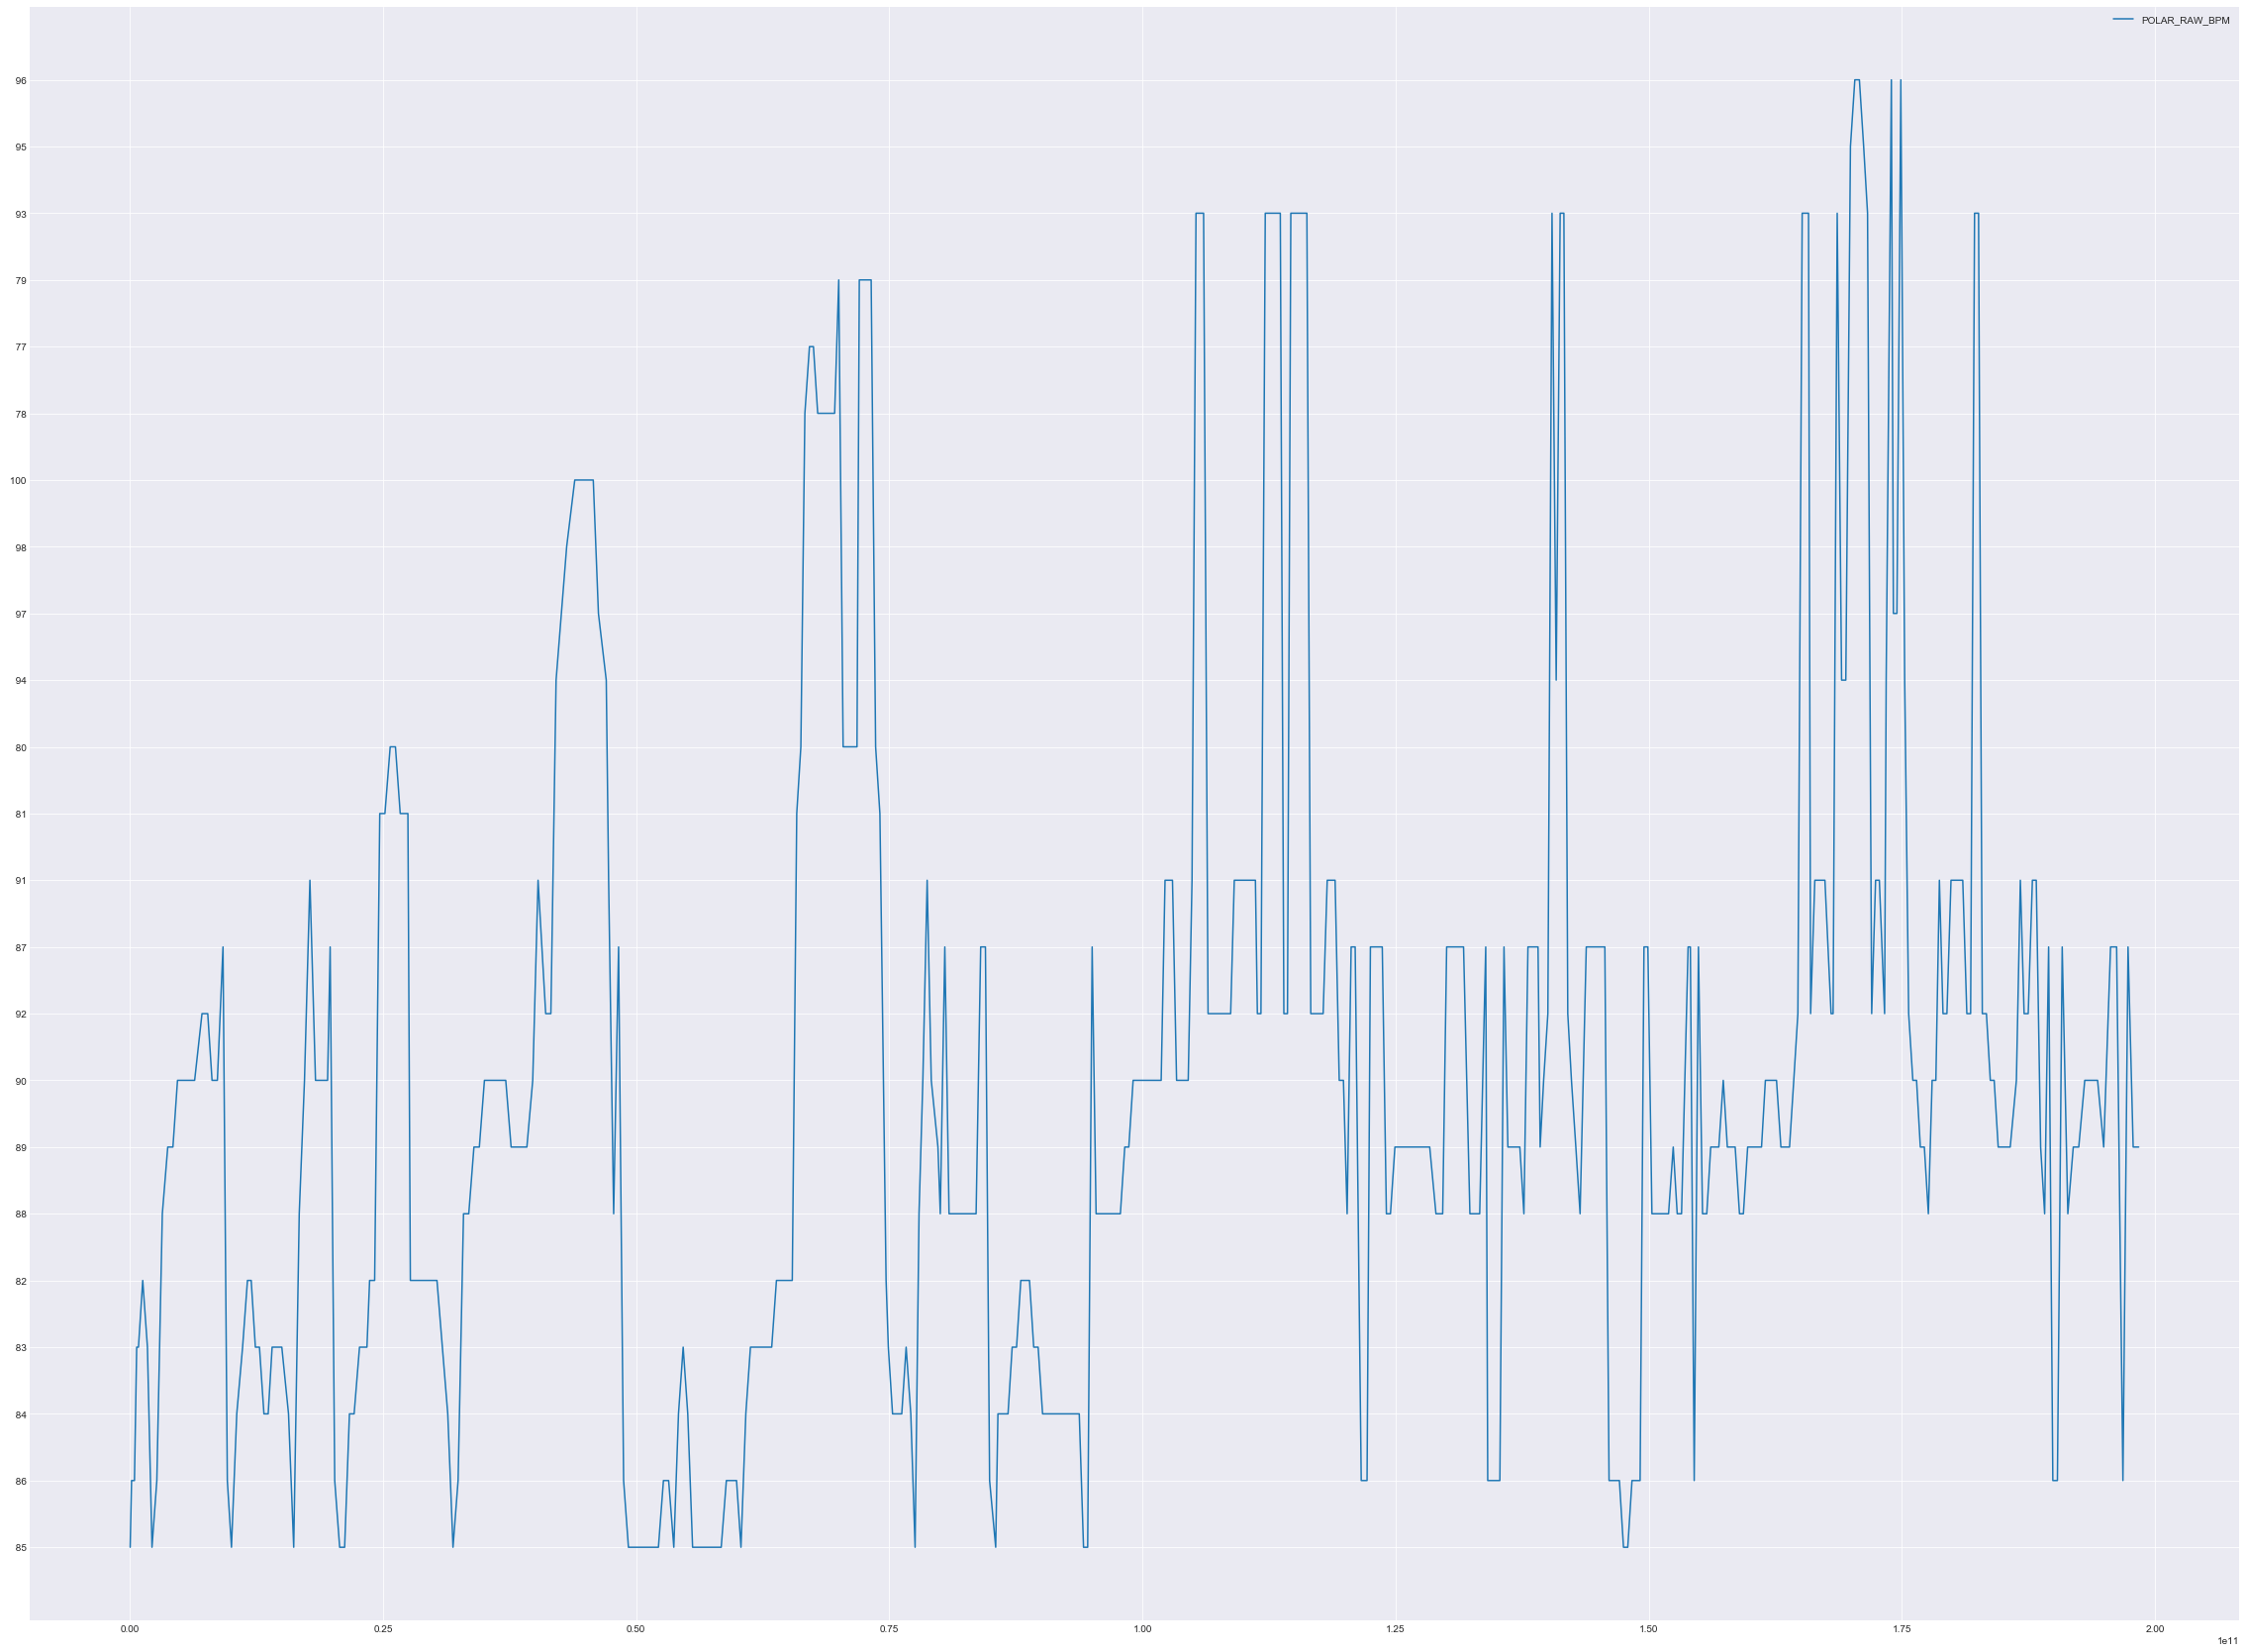

In [241]:
plt.plot(polar_t_bpm_rr['rosbagTimestamp'],polar_t_bpm_rr['bpm'], label="POLAR_RAW_BPM")
plt.legend()

In [240]:
polar_t_bpm_rr.keys

<bound method NDFrame.keys of                  t  bpm    rr  rosbagTimestamp
0    "15_07_51_723   85   689         36000000
1    "15_07_52_712   86   685        172000000
2    "15_07_53_702   86   700        334000000
3    "15_07_54_692   86   731        457000000
4    "15_07_55_682   84   777        566000000
..             ...  ...   ...              ...
452  "15_15_23_664   87   740     196198000000
453  "15_15_24_654   86   728     196821000000
454  "15_15_25_644   87   699     197325000000
455  "15_15_26_634   89   661     197832000000
456  "15_15_27_624   89   651     198380000000

[457 rows x 4 columns]>

# Shifting/Rolling Window Correlation

In [332]:
#outdated 
#pd.rolling_corr(polar_t_bpm_rr['rr'], polar_t_bpm_rr['rr'], 12)

AttributeError: module 'pandas' has no attribute 'rolling'

In [307]:
df_corr=pd.DataFrame(polar_t_bpm_rr['rr'][0:435].astype(int))
df_corr['bio_rr']=pd.DataFrame(rri_interpol_bio_clean)

### Set window size here!!!

In [326]:
windowsize = 20
c = df_corr["rr"].rolling(windowsize).corr(df_corr['bio_rr'])

In [327]:
c.tail()

430    0.265404
431    0.288380
432    0.379294
433    0.301103
434    0.202206
dtype: float64

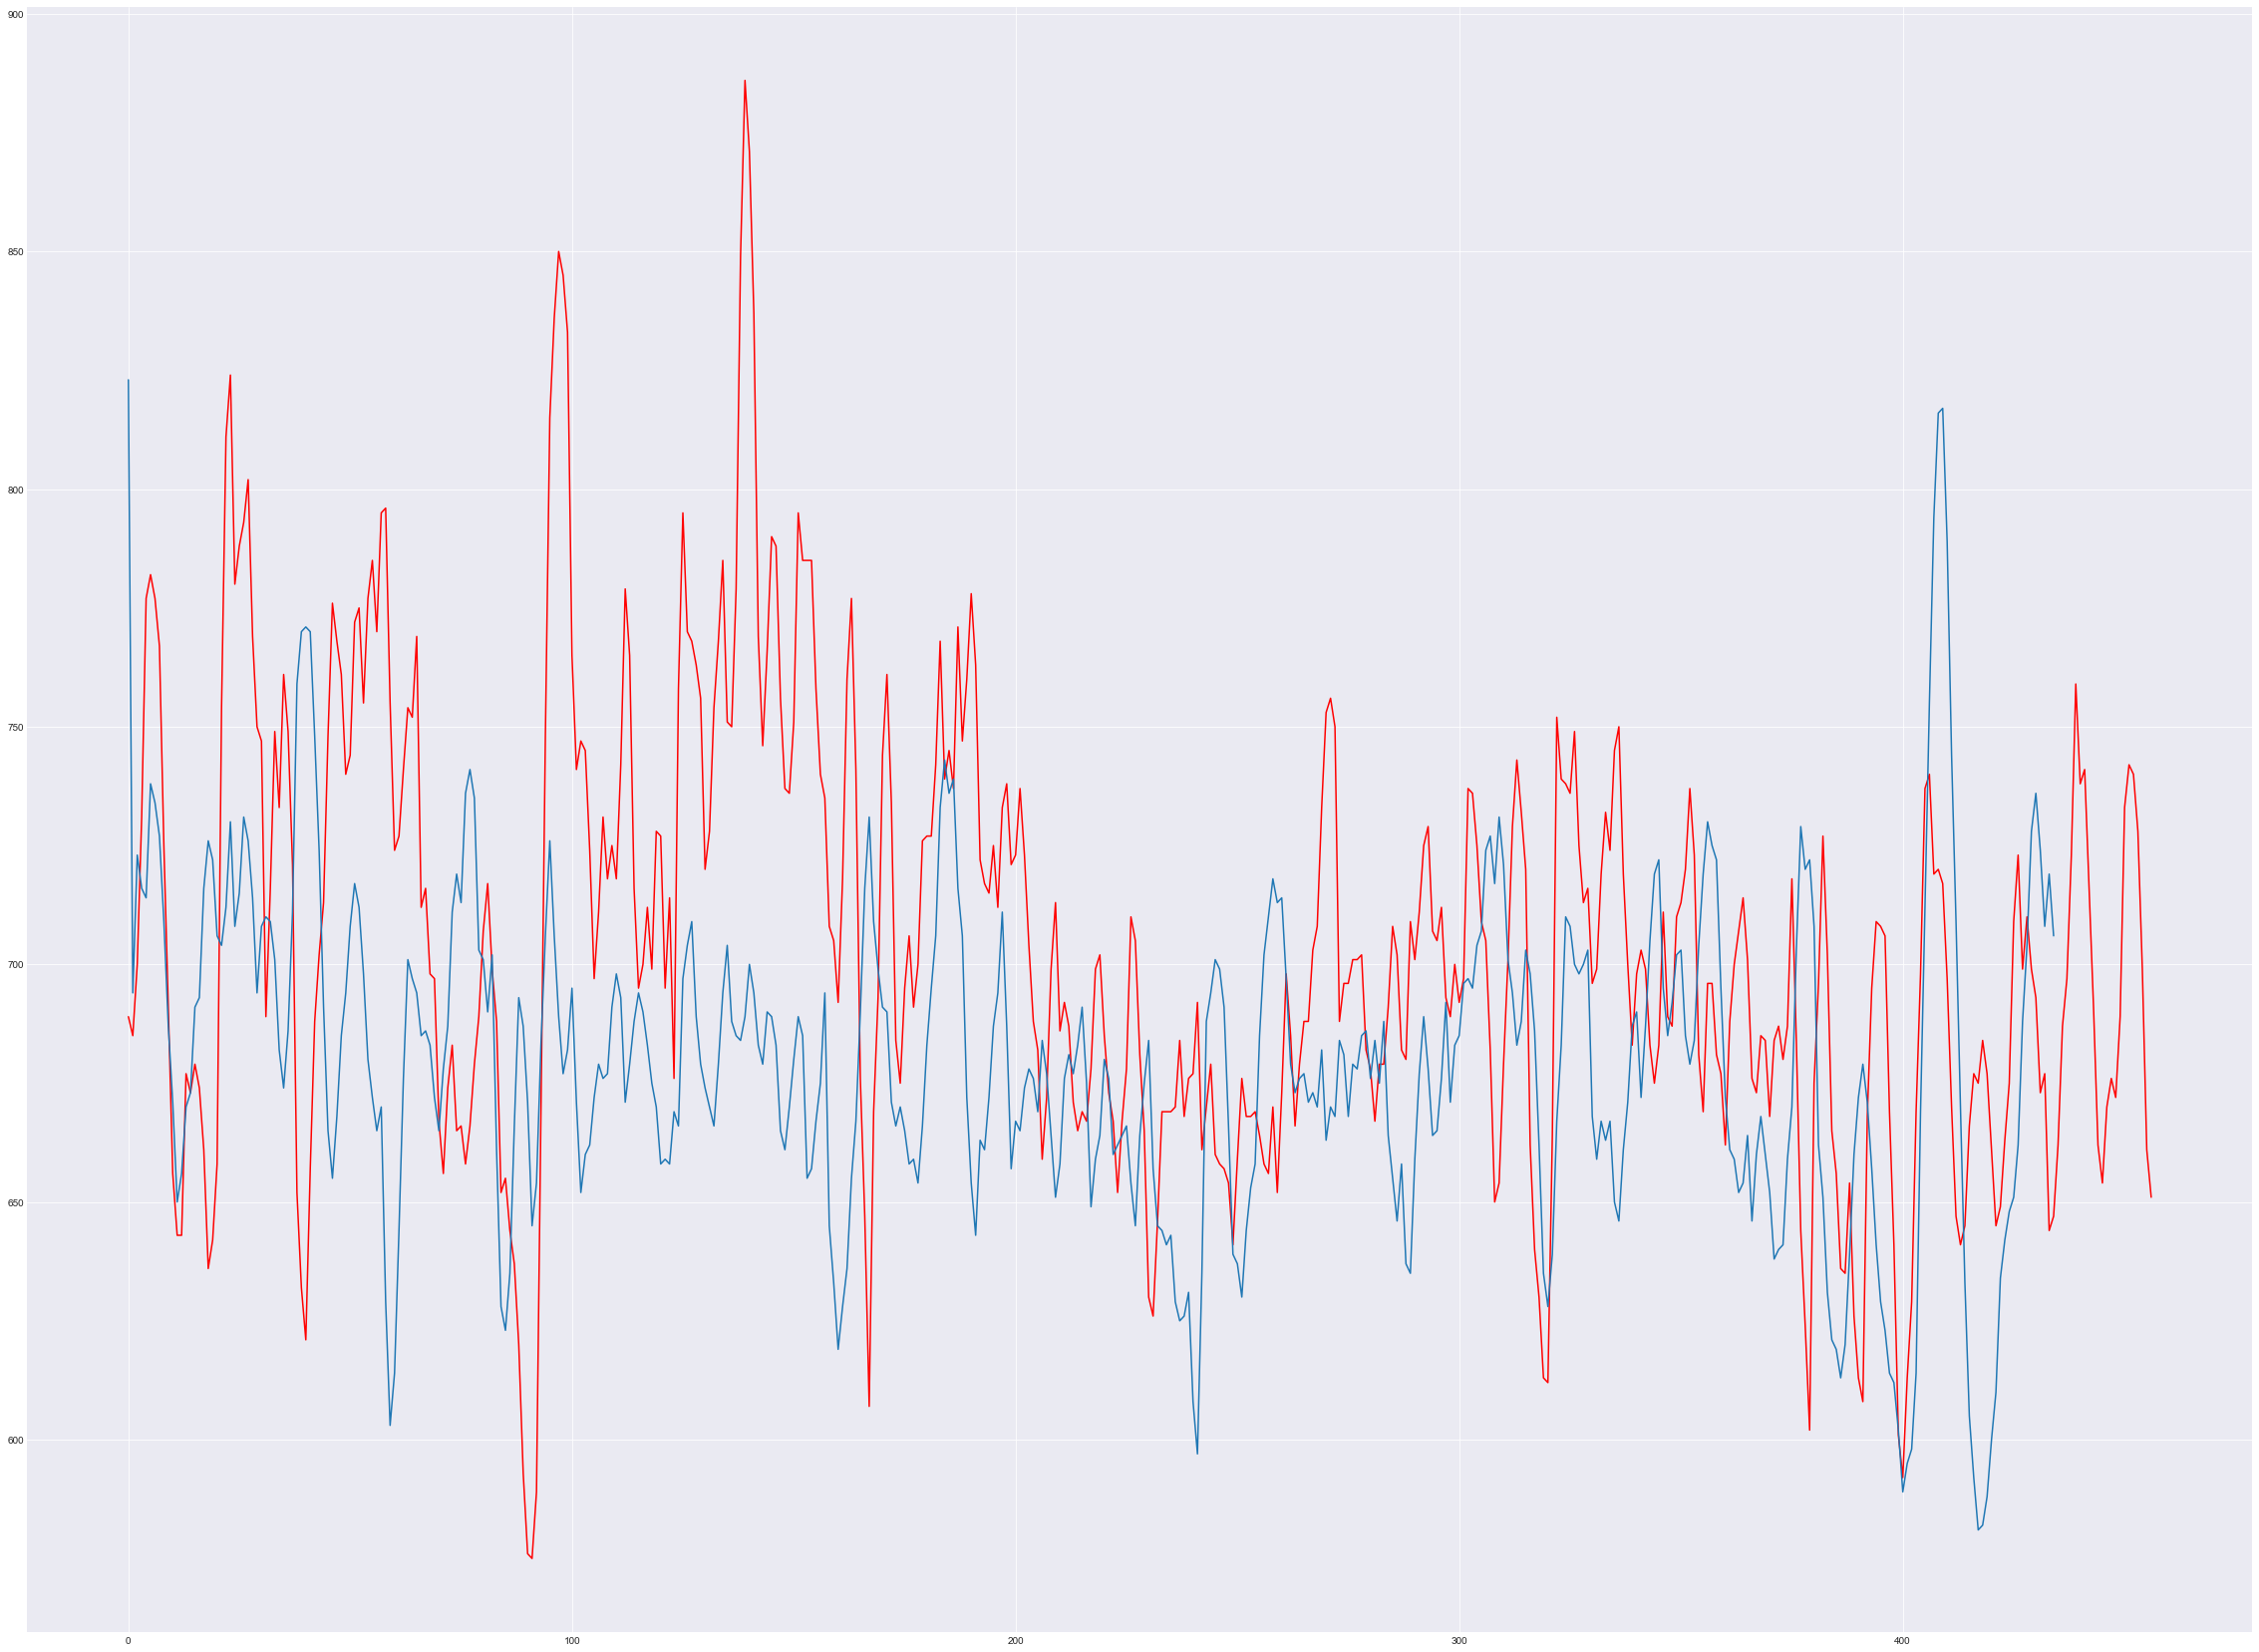

In [328]:
plt.plot(rri, label="POLAR RRI", color="red")
plt.plot(rri_interpol_bio_clean, label = "Biopac Cleaned")

AttributeError: 'function' object has no attribute 'mean'

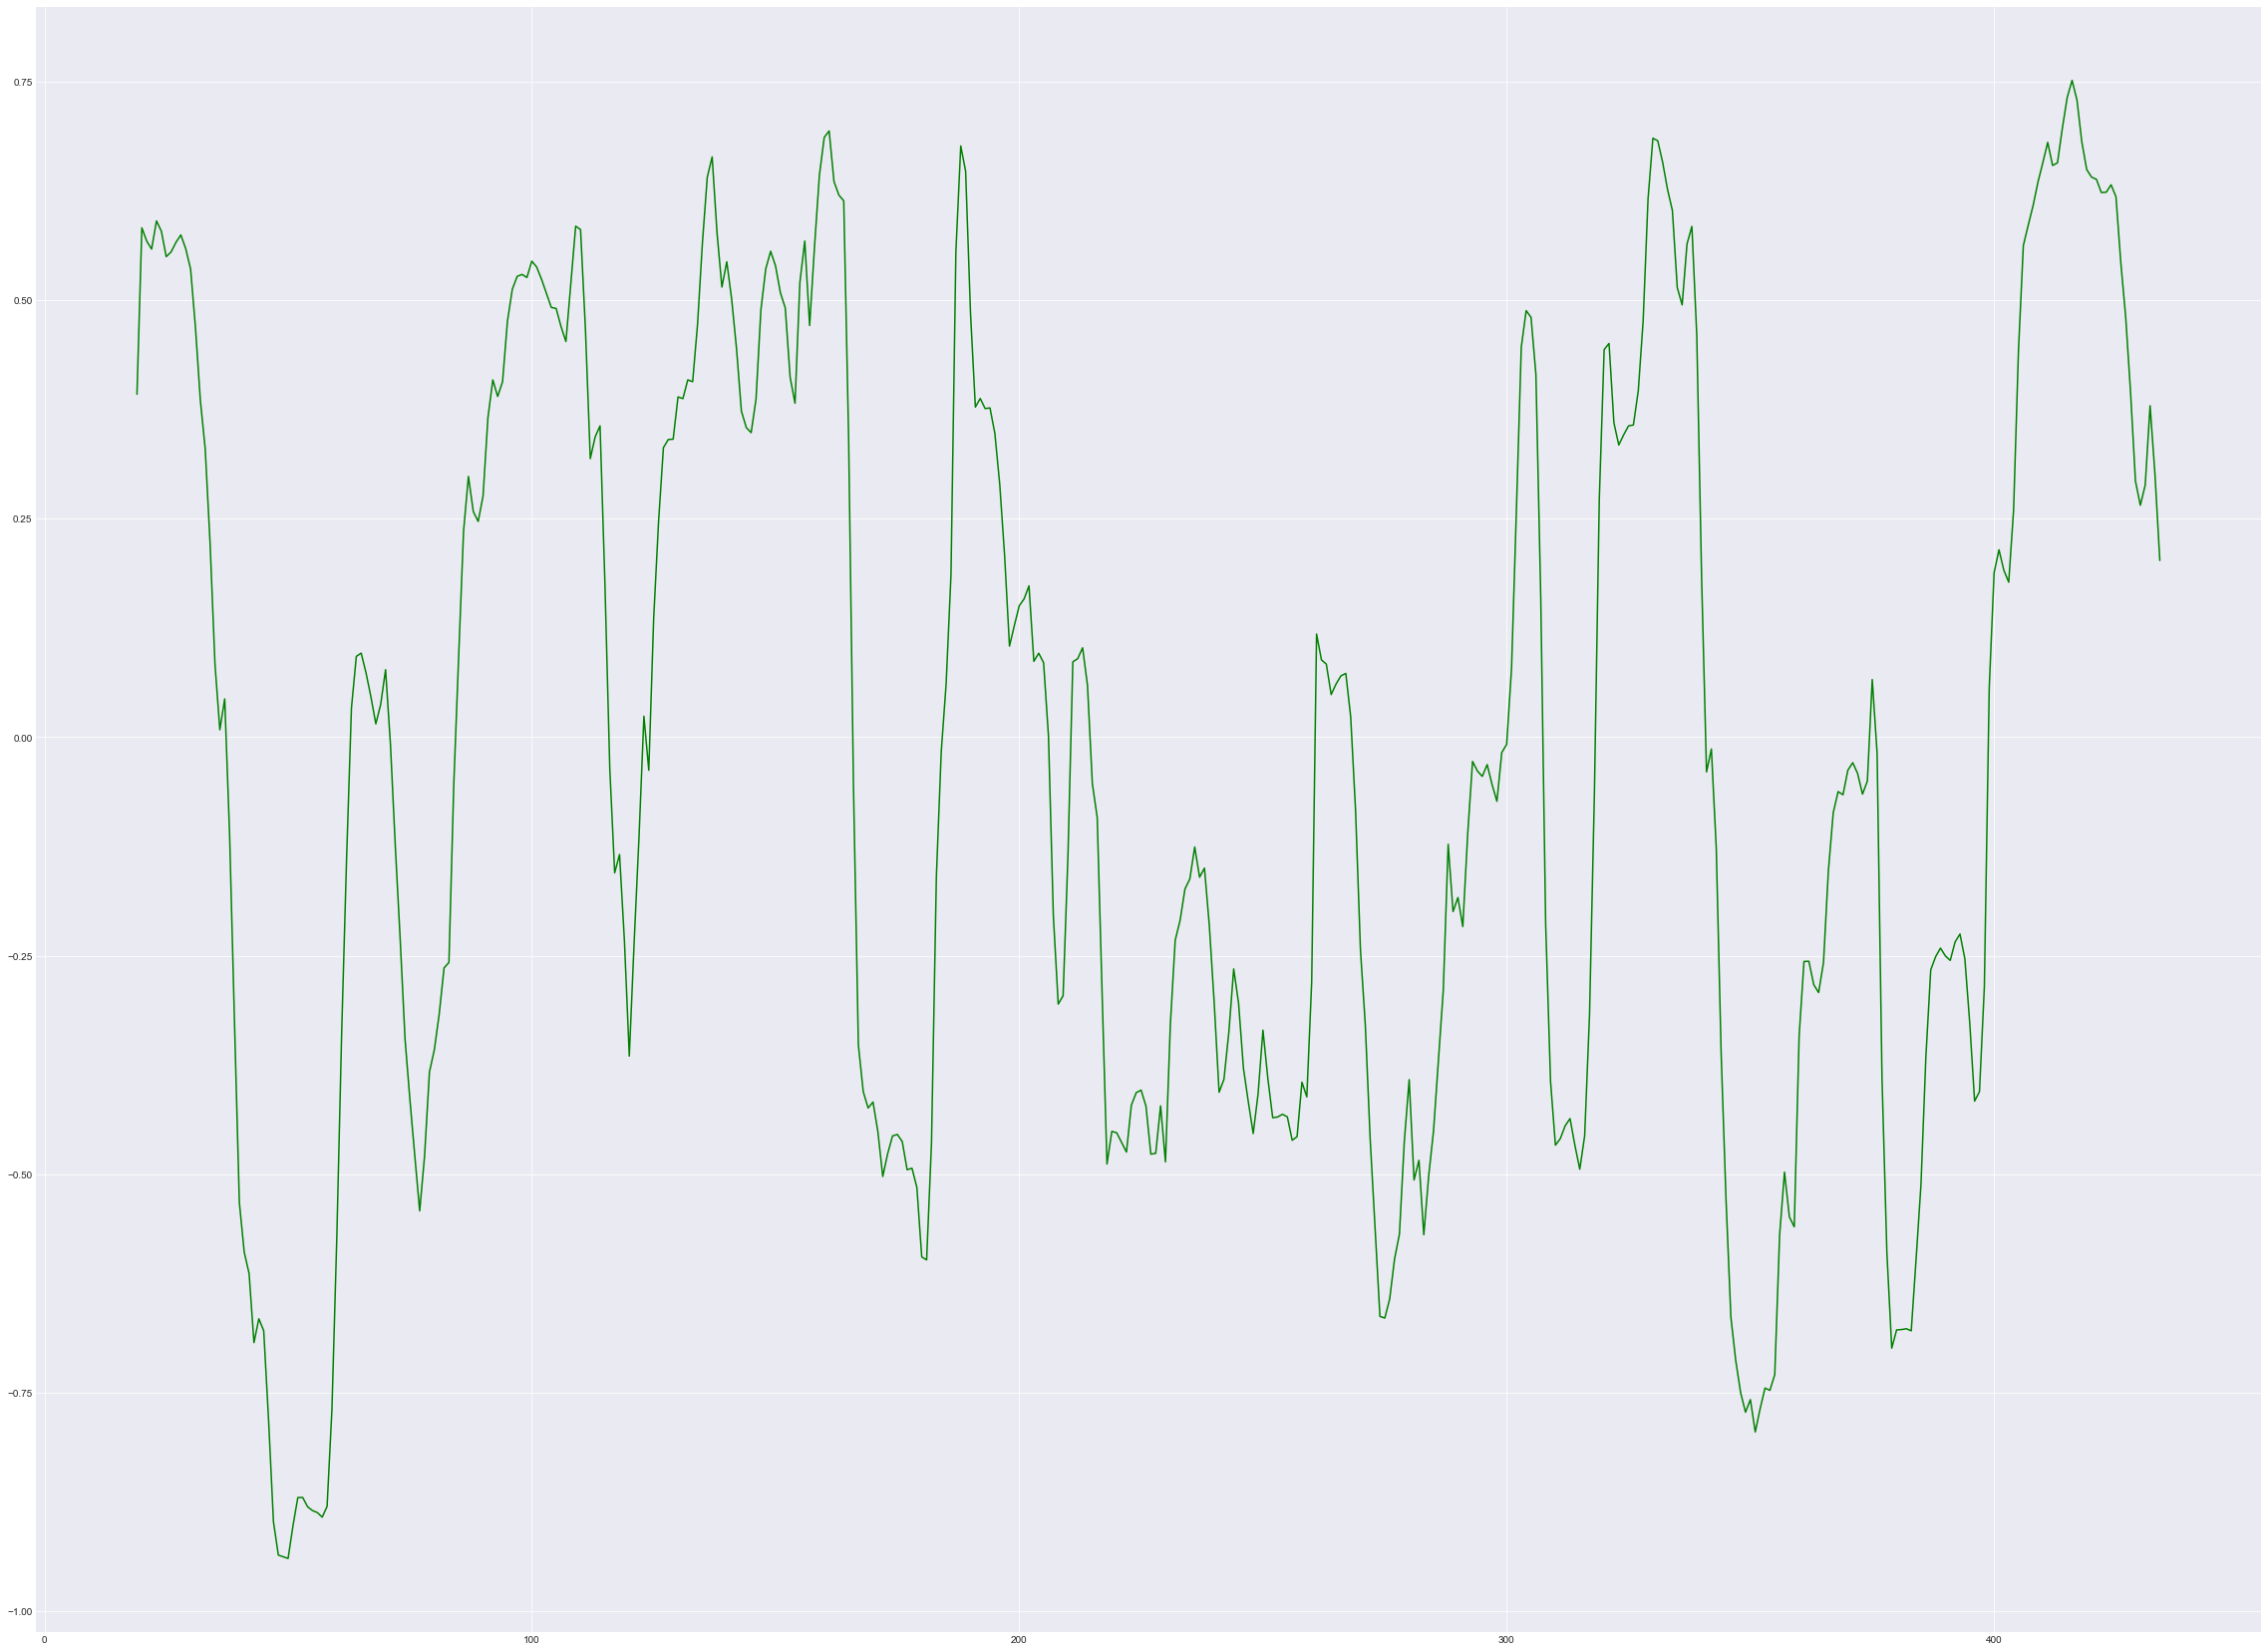

In [329]:
plt.plot(c, label = "CORR WINDOWED", color="green")
plt.plot(c.rolling.mean(10), label = "CORR WINDOWED", color="yellow")

In [330]:
c.sum()

-5.850038057795187